# _Credit Card Fraud Detection_

In [181]:
# lib for extraction, manipulation, analysis
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for stats
import scipy.stats 
from scipy.stats import shapiro, chi2, normaltest, kstest, zscore,skew, mode

# train test split
from sklearn.model_selection import train_test_split

# to ignore wornings
import warnings
warnings.simplefilter('ignore')

In [182]:
# import data and convert it into Pandas Dataframe
df=pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
# check last rows
df.tail(10000)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
274617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
df=df.dropna()

In [185]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9670,14456.0,1.115259,-0.260823,0.811221,0.189364,-0.716997,-0.057914,-0.670599,0.147799,1.657007,...,0.012399,0.181928,-0.003799,0.015008,0.054398,1.044765,-0.089224,-0.006321,39.00,0.0
9671,14456.0,1.145354,-0.148514,0.936283,0.216933,-0.759332,-0.181656,-0.664766,0.112834,1.576739,...,0.017393,0.270611,0.035968,0.219824,0.050312,1.033494,-0.081524,-0.007387,15.95,0.0
9672,14456.0,1.160532,-0.087203,0.869200,0.159599,-0.576655,-0.041852,-0.606592,0.073629,1.451205,...,0.014458,0.308221,-0.000557,0.038838,0.108999,1.043173,-0.075765,-0.007494,15.95,0.0
9673,14456.0,1.116287,-0.307350,0.795992,0.134097,-0.606532,0.370756,-0.850000,0.350518,1.811785,...,0.014782,0.229071,0.060400,-0.332051,-0.047281,1.080795,-0.074628,-0.016195,14.95,0.0


In [186]:
# check no of column and rows 
df.shape

(9675, 31)

In [187]:
# check the size of data 
df.size

299925

In [188]:
# check information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9675 entries, 0 to 9674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9675 non-null   float64
 1   V1      9675 non-null   float64
 2   V2      9675 non-null   float64
 3   V3      9675 non-null   float64
 4   V4      9675 non-null   float64
 5   V5      9675 non-null   float64
 6   V6      9675 non-null   float64
 7   V7      9675 non-null   float64
 8   V8      9675 non-null   float64
 9   V9      9675 non-null   float64
 10  V10     9675 non-null   float64
 11  V11     9675 non-null   float64
 12  V12     9675 non-null   float64
 13  V13     9675 non-null   float64
 14  V14     9675 non-null   float64
 15  V15     9675 non-null   float64
 16  V16     9675 non-null   float64
 17  V17     9675 non-null   float64
 18  V18     9675 non-null   float64
 19  V19     9675 non-null   float64
 20  V20     9675 non-null   float64
 21  V21     9675 non-null   float64
 22  V22  

In [189]:
# check stats
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,9675.000000,9675.000000,9675.000000,9675.000000,9675.000000,9675.000000,9675.000000,9675.000000,9675.000000,9675.000000,...,9675.000000,9675.000000,9675.000000,9675.000000,9675.000000,9675.000000,9675.000000,9675.000000,9675.000000,9675.000000
mean,5676.172920,-0.259083,0.289293,0.905194,0.259481,-0.043229,0.124561,-0.061847,-0.069760,0.782701,...,-0.052693,-0.158036,-0.033042,0.022670,0.088034,0.093819,0.007563,0.003385,63.125916,0.003928
std,4254.093741,1.525581,1.318384,1.164623,1.449058,1.190005,1.310283,1.086960,1.273322,1.161303,...,0.926733,0.634333,0.492722,0.594899,0.430055,0.553969,0.416232,0.269066,185.815203,0.062551
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.000000
25%,1986.000000,-1.028020,-0.204710,0.410064,-0.627093,-0.639608,-0.642180,-0.528820,-0.194643,0.049901,...,-0.269987,-0.554063,-0.177601,-0.330585,-0.159895,-0.332135,-0.083277,-0.016115,5.000000,0.000000
50%,4330.000000,-0.386726,0.304045,0.949176,0.225286,-0.142148,-0.165468,-0.040700,0.007627,0.774420,...,-0.128758,-0.146817,-0.047230,0.082359,0.122591,0.037225,-0.002321,0.016661,15.950000,0.000000
75%,9618.500000,1.146513,0.914765,1.605970,1.128328,0.374123,0.502615,0.485841,0.275762,1.483150,...,0.033096,0.240545,0.083364,0.412688,0.360815,0.437726,0.125319,0.078649,52.000000,0.000000
max,14456.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [190]:
# check the datatypes of feature
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [191]:
# check the NaN value count 
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### univariate analysis of columns

###### Statistical analysis of numerical columns

In [194]:
# create a function for calculating statistical analysis of numerical column
def cal_stats(data, column_name):
    column = data[column_name]
    # Calculating statistics
    stats = {
        'Mean': column.mean(),
        'Median': column.median(),
        'Mode': mode(column)[0],
        'Min': column.min(),
        'Max': column.max(),
        'Range': column.max() - column.min(),
        'Variance': column.var(),
        'Standard Deviation': column.std(),
        'Skewness': skew(column),
    } 
    df1=pd.DataFrame.from_dict(stats,orient='index',columns=['Statistics'])
    return df1

In [195]:
# statistical analysis of column  Time
cal_stats(df,"Time")

,Statistics
Mean,5.676173e+03
Median,4.330000e+03
Mode,3.767000e+03
Min,0.000000e+00
Max,1.445600e+04
Range,1.445600e+04
Variance,1.809731e+07
Standard Deviation,4.254094e+03
Skewness,4.511787e-01


In [196]:
cal_stats(df,"V1")

,Statistics
Mean,-0.259083
Median,-0.386726
Mode,-0.302521
Min,-27.670569
Max,1.960497
Range,29.631065
Variance,2.327397
Standard Deviation,1.525581
Skewness,-2.183880


In [197]:
cal_stats(df,"V2")

,Statistics
Mean,0.289293
Median,0.304045
Mode,0.447474
Min,-34.607649
Max,8.636214
Range,43.243863
Variance,1.738136
Standard Deviation,1.318384
Skewness,-3.887302


In [198]:
cal_stats(df,"V3")

,Statistics
Mean,0.905194
Median,0.949176
Mode,-0.495757
Min,-15.496222
Max,4.101716
Range,19.597938
Variance,1.356348
Standard Deviation,1.164623
Skewness,-2.617918


In [199]:
cal_stats(df,"V4")

,Statistics
Mean,0.259481
Median,0.225286
Mode,-3.214799
Min,-4.657545
Max,10.463020
Range,15.120565
Variance,2.099770
Standard Deviation,1.449058
Skewness,0.349897


In [200]:
cal_stats(df,"V5")

,Statistics
Mean,-0.043229
Median,-0.142148
Mode,2.705041
Min,-32.092129
Max,34.099309
Range,66.191438
Variance,1.416113
Standard Deviation,1.190005
Skewness,1.183111


In [201]:
cal_stats(df,"V6")

,Statistics
Mean,0.124561
Median,-0.165468
Mode,2.762440
Min,-23.496714
Max,21.393069
Range,44.889783
Variance,1.716843
Standard Deviation,1.310283
Skewness,1.059054


In [202]:
cal_stats(df,"V7")

,Statistics
Mean,-0.061847
Median,-0.040700
Mode,0.593847
Min,-26.548144
Max,34.303177
Range,60.851321
Variance,1.181481
Standard Deviation,1.086960
Skewness,0.392776


In [203]:
cal_stats(df,"V8")

,Statistics
Mean,-0.069760
Median,0.007627
Mode,0.556451
Min,-23.632502
Max,5.060381
Range,28.692884
Variance,1.621349
Standard Deviation,1.273322
Skewness,-9.676399


In [204]:
cal_stats(df,"V9")

,Statistics
Mean,0.782701
Median,0.774420
Mode,0.697720
Min,-6.329801
Max,10.392889
Range,16.722690
Variance,1.348625
Standard Deviation,1.161303
Skewness,0.517605


In [205]:
cal_stats(df,"V10")

,Statistics
Mean,-0.214961
Median,-0.328414
Mode,-1.090181
Min,-13.193415
Max,12.259949
Range,25.453364
Variance,1.221201
Standard Deviation,1.105080
Skewness,1.145527


In [206]:
cal_stats(df,"V11")

,Statistics
Mean,0.744403
Median,0.723201
Mode,-0.111088
Min,-2.595325
Max,12.018913
Range,14.614238
Variance,1.362235
Standard Deviation,1.167148
Skewness,0.756771


In [207]:
cal_stats(df,"V12")

,Statistics
Mean,-1.242589
Median,-1.577131
Mode,0.062652
Min,-17.769143
Max,3.774837
Range,21.543981
Variance,2.372681
Standard Deviation,1.540351
Skewness,-0.998321


In [208]:
cal_stats(df,"V13")

,Statistics
Mean,0.831156
Median,0.891154
Mode,-0.238457
Min,-3.389510
Max,4.465413
Range,7.854923
Variance,1.486644
Standard Deviation,1.219280
Skewness,-0.228168


In [209]:
cal_stats(df,"V14")

,Statistics
Mean,0.674989
Median,0.851704
Mode,0.215738
Min,-19.214325
Max,5.748734
Range,24.963059
Variance,1.556810
Standard Deviation,1.247722
Skewness,-4.251500


In [210]:
cal_stats(df,"V15")

,Statistics
Mean,-0.130679
Median,-0.022553
Mode,1.069356
Min,-4.152532
Max,3.635042
Range,7.787573
Variance,0.954839
Standard Deviation,0.977159
Skewness,-0.510475


In [211]:
cal_stats(df,"V16")

,Statistics
Mean,-0.015385
Median,0.054319
Mode,-0.255231
Min,-12.227189
Max,4.087802
Range,16.314991
Variance,0.785929
Standard Deviation,0.886526
Skewness,-2.008557


In [212]:
cal_stats(df,"V17")

,Statistics
Mean,0.311011
Median,0.288552
Mode,-1.072085
Min,-18.587366
Max,7.893393
Range,26.480759
Variance,0.950655
Standard Deviation,0.975015
Skewness,-3.880707


In [213]:
cal_stats(df,"V18")

,Statistics
Mean,-0.020814
Median,0.018034
Mode,0.485110
Min,-6.920762
Max,4.115560
Range,11.036322
Variance,0.639855
Standard Deviation,0.799909
Skewness,-0.567527


In [214]:
cal_stats(df,"V19")

,Statistics
Mean,-0.063476
Median,-0.064453
Mode,0.271315
Min,-4.932733
Max,4.555359
Range,9.488092
Variance,0.655038
Standard Deviation,0.809344
Skewness,-0.142731


In [215]:
cal_stats(df,"V20")

,Statistics
Mean,0.029495
Median,-0.018058
Mode,0.156089
Min,-13.276034
Max,8.012574
Range,21.288609
Variance,0.354902
Standard Deviation,0.595737
Skewness,-1.004718


In [216]:
cal_stats(df,"V21")

,Statistics
Mean,-0.052693
Median,-0.128758
Mode,0.007343
Min,-11.468435
Max,22.588989
Range,34.057424
Variance,0.858835
Standard Deviation,0.926733
Skewness,8.669713


In [217]:
cal_stats(df,"V22")

,Statistics
Mean,-0.158036
Median,-0.146817
Mode,0.250886
Min,-8.527145
Max,4.534454
Range,13.061599
Variance,0.402379
Standard Deviation,0.634333
Skewness,-1.102594


In [218]:
cal_stats(df,"V23")

,Statistics
Mean,-0.033042
Median,-0.047230
Mode,-0.331600
Min,-15.144340
Max,13.876221
Range,29.020561
Variance,0.242775
Standard Deviation,0.492722
Skewness,-3.218364


In [219]:
cal_stats(df,"V24")

,Statistics
Mean,0.022670
Median,0.082359
Mode,1.009952
Min,-2.512377
Max,3.200201
Range,5.712578
Variance,0.353904
Standard Deviation,0.594899
Skewness,-0.671291


In [220]:
cal_stats(df,"V25")

,Statistics
Mean,0.088034
Median,0.122591
Mode,0.233730
Min,-2.577363
Max,5.525093
Range,8.102455
Variance,0.184948
Standard Deviation,0.430055
Skewness,-0.337670


In [221]:
cal_stats(df,"V26")

,Statistics
Mean,0.093819
Median,0.037225
Mode,-0.824471
Min,-1.338556
Max,3.517346
Range,4.855902
Variance,0.306882
Standard Deviation,0.553969
Skewness,0.453457


In [222]:
cal_stats(df,"V27")

,Statistics
Mean,0.007563
Median,-0.002321
Mode,0.241305
Min,-7.976100
Max,8.254376
Range,16.230475
Variance,0.173249
Standard Deviation,0.416232
Skewness,-3.485310


In [223]:
cal_stats(df,"V28")

,Statistics
Mean,0.003385
Median,0.016661
Mode,-0.020359
Min,-3.509250
Max,4.860769
Range,8.370019
Variance,0.072397
Standard Deviation,0.269066
Skewness,0.910164


In [224]:
cal_stats(df,"Amount")

,Statistics
Mean,63.125916
Median,15.950000
Mode,1.000000
Min,0.000000
Max,7712.430000
Range,7712.430000
Variance,34527.289577
Standard Deviation,185.815203
Skewness,14.626953


In [225]:
cal_stats(df,"Class")

,Statistics
Mean,0.003928
Median,0.000000
Mode,0.000000
Min,0.000000
Max,1.000000
Range,1.000000
Variance,0.003913
Standard Deviation,0.062551
Skewness,15.862194


##### visualization of numerical data by histogram

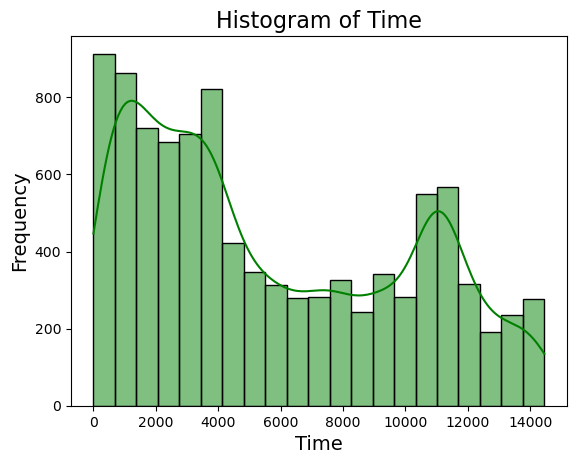

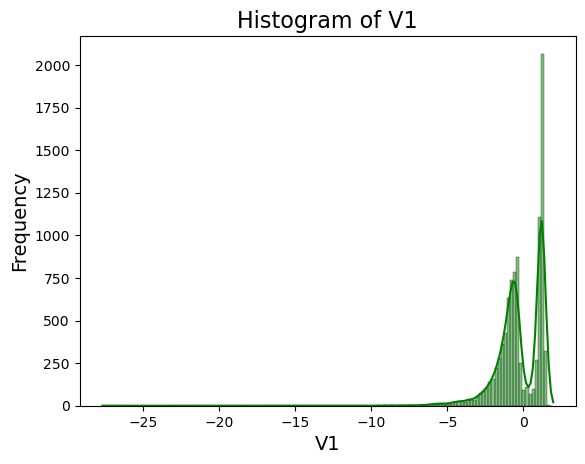

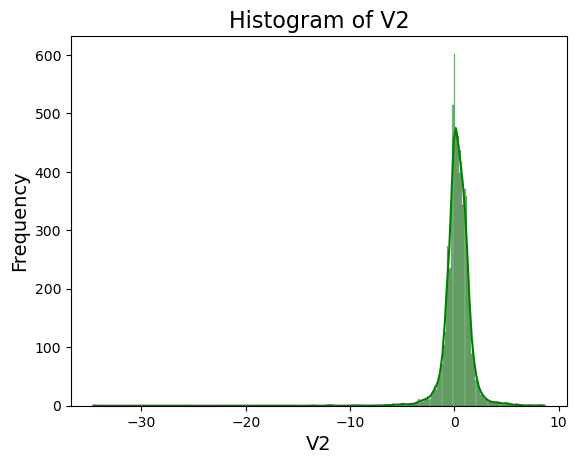

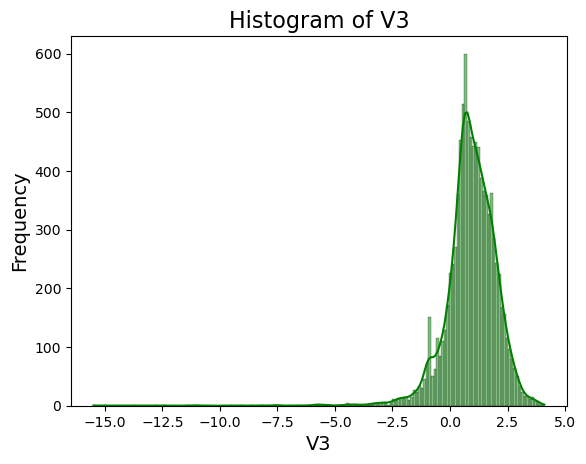

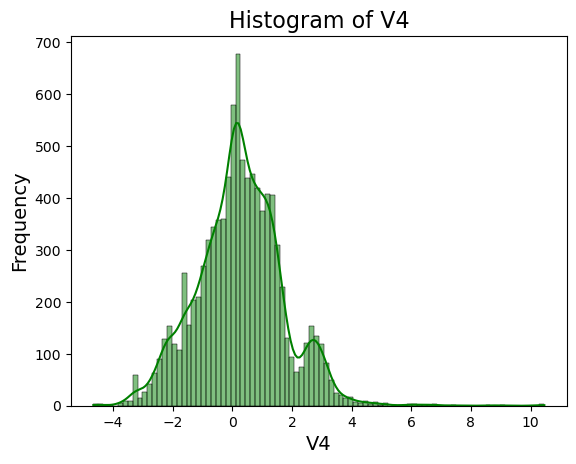

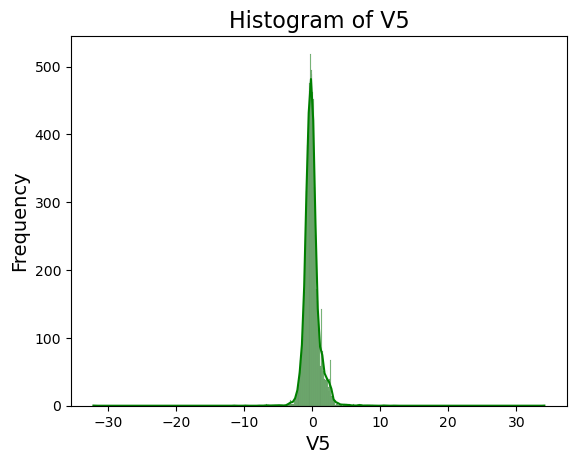

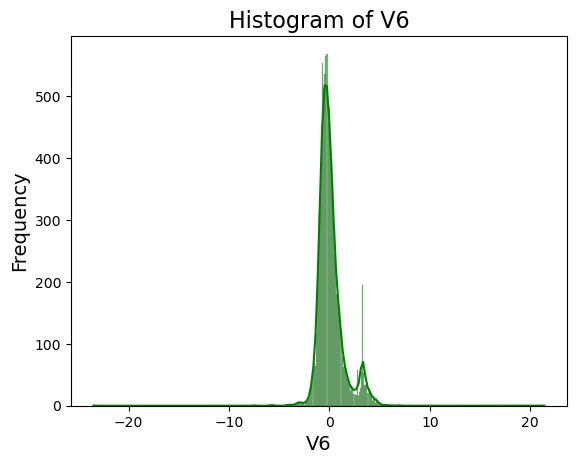

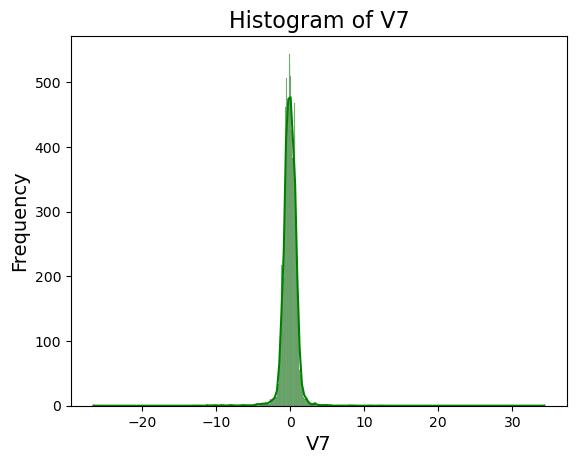

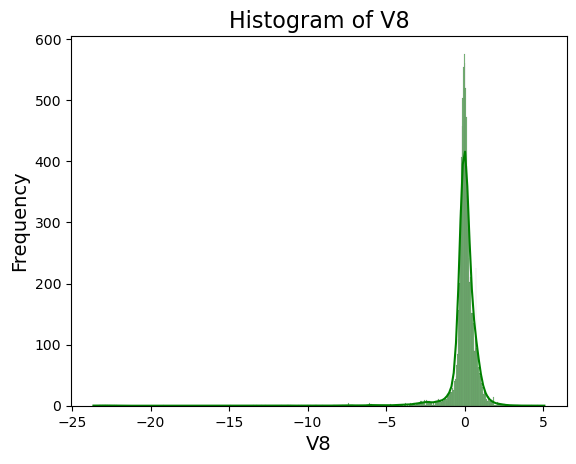

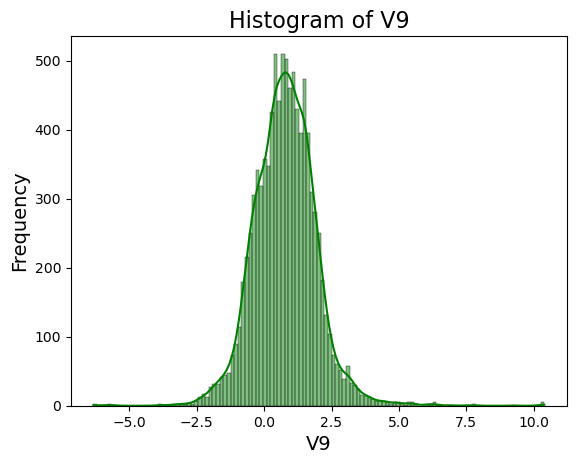

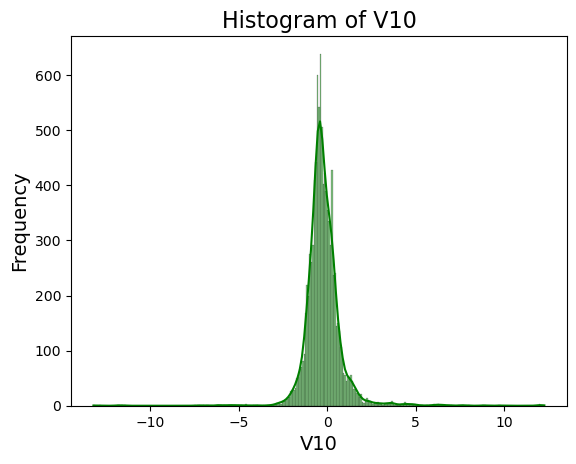

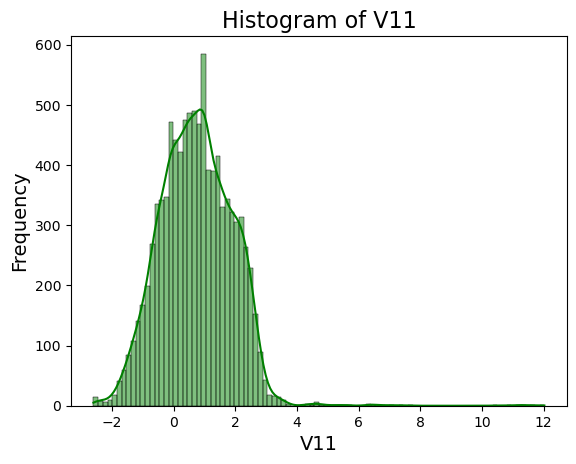

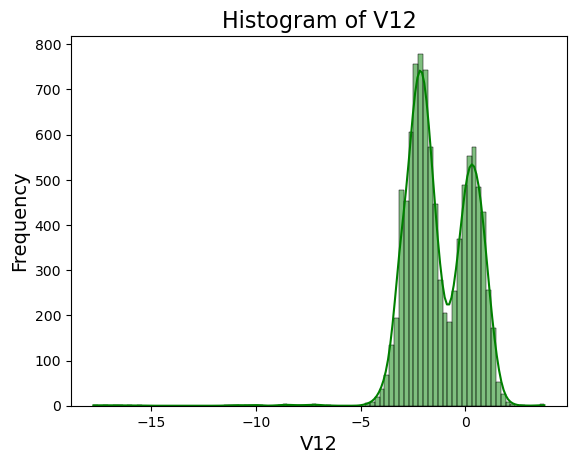

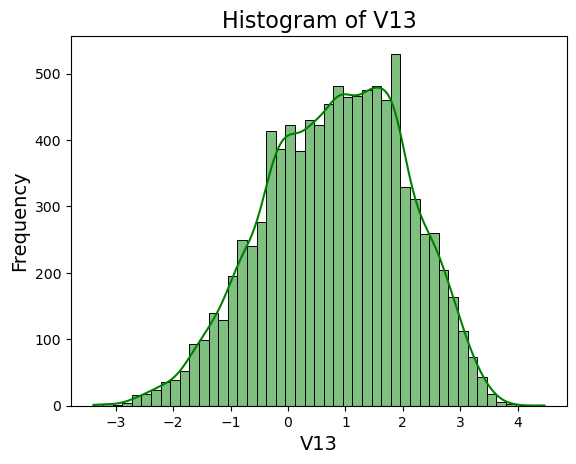

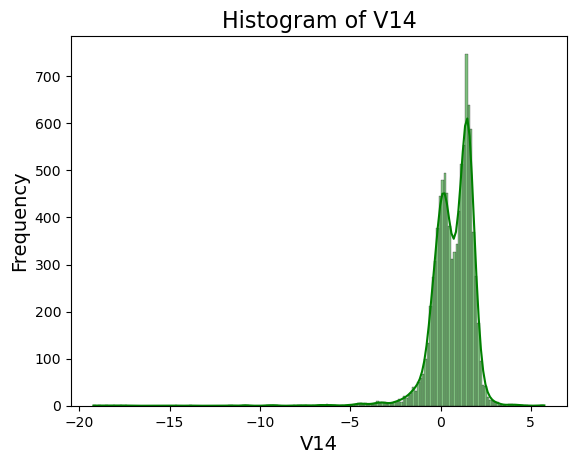

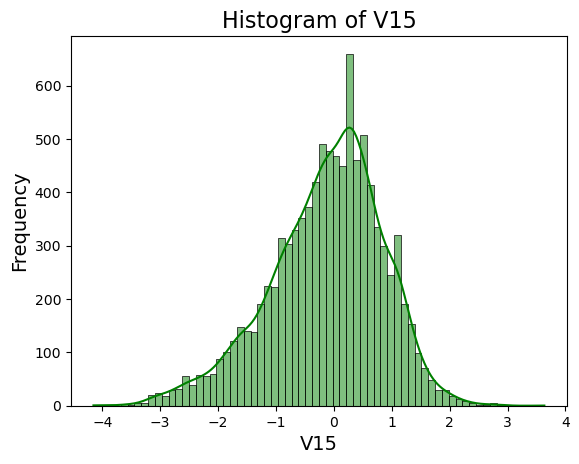

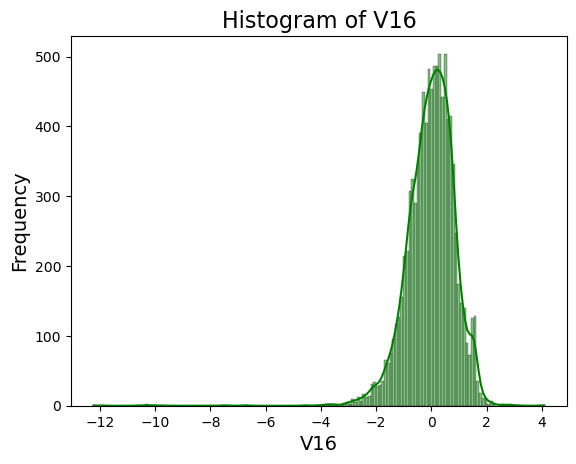

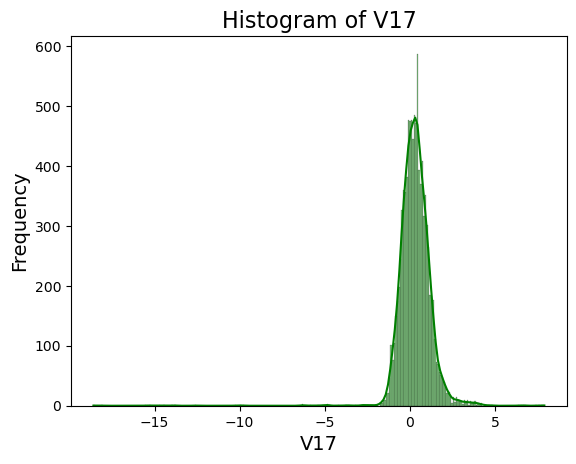

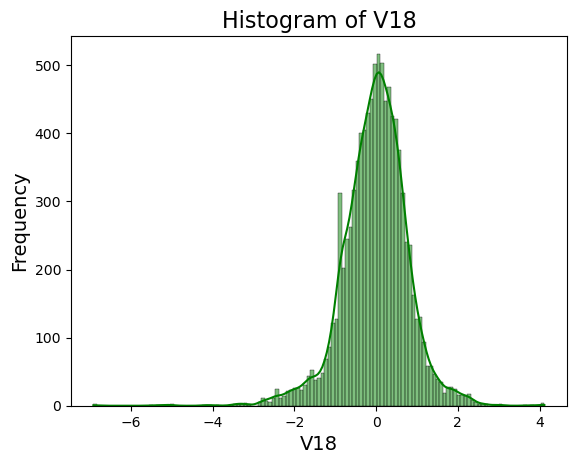

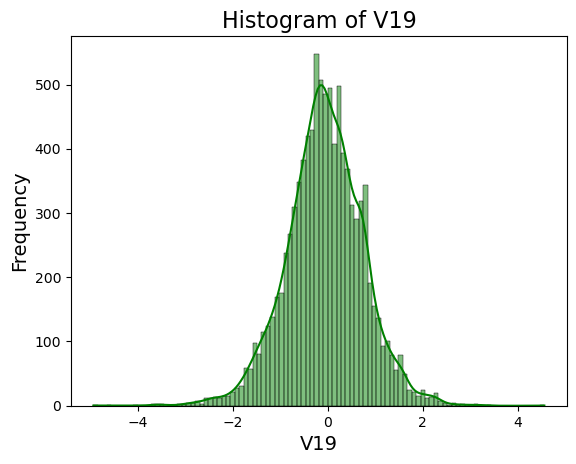

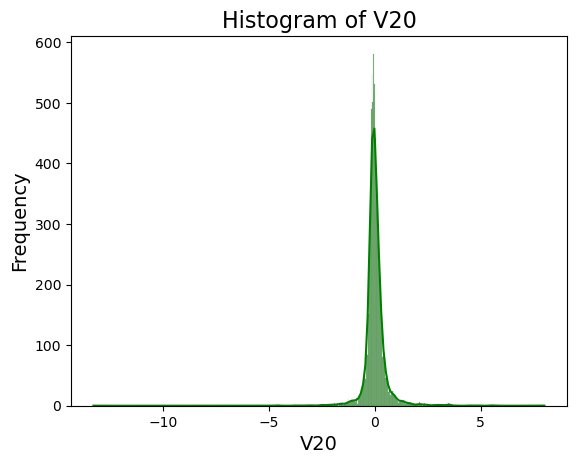

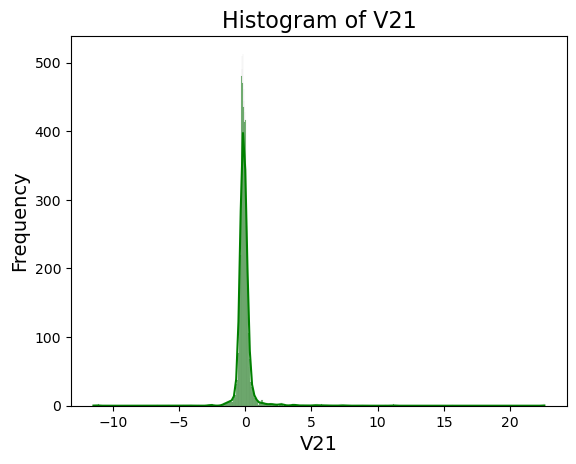

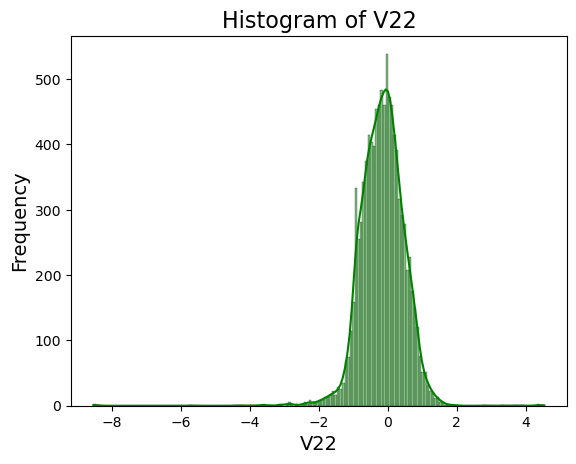

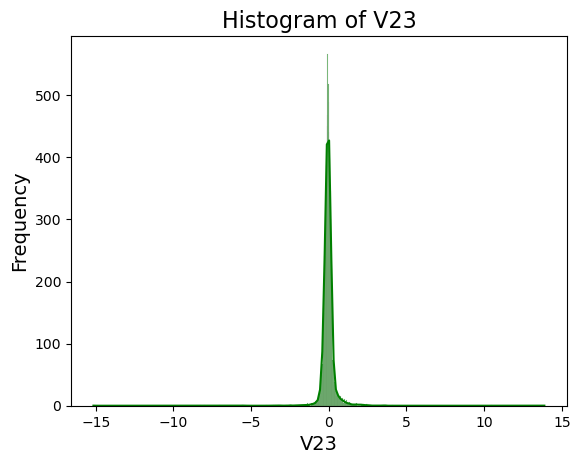

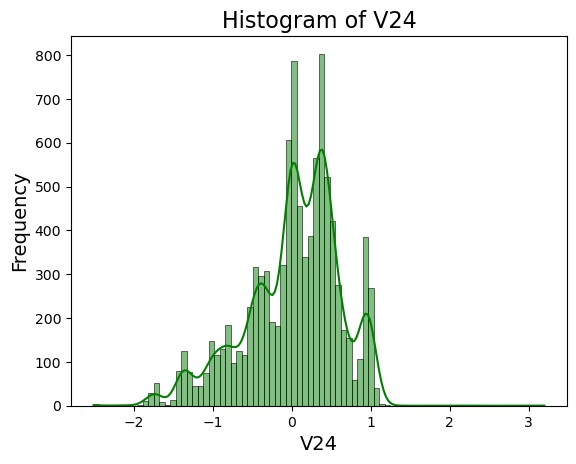

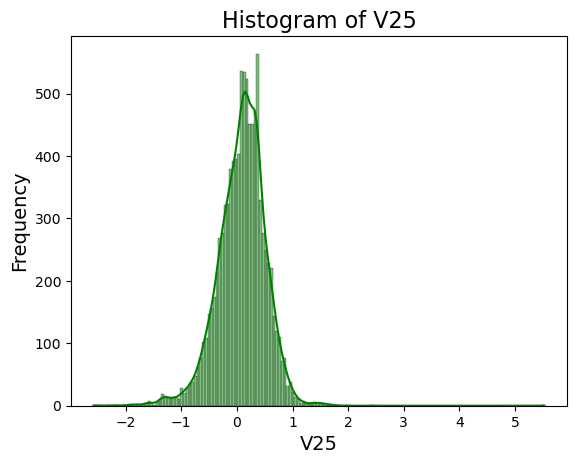

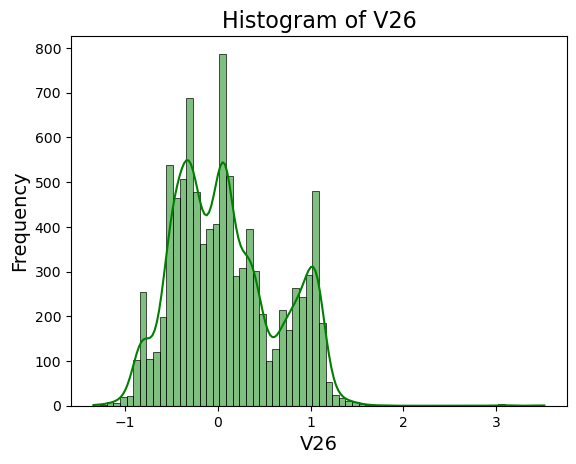

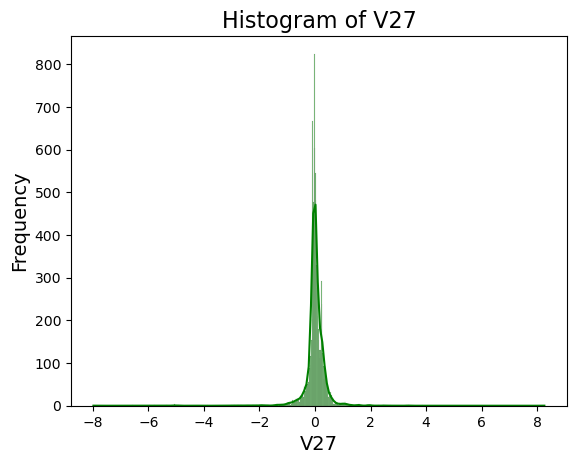

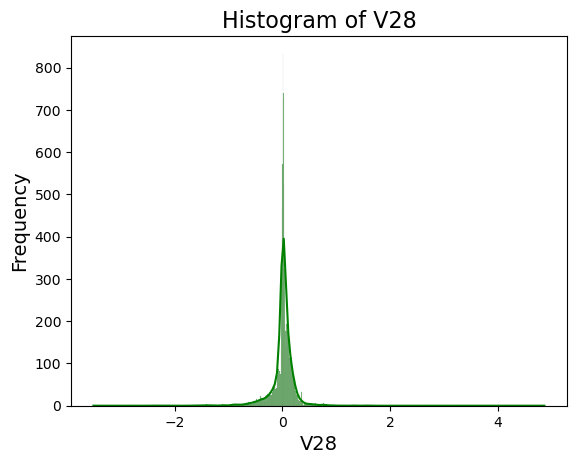

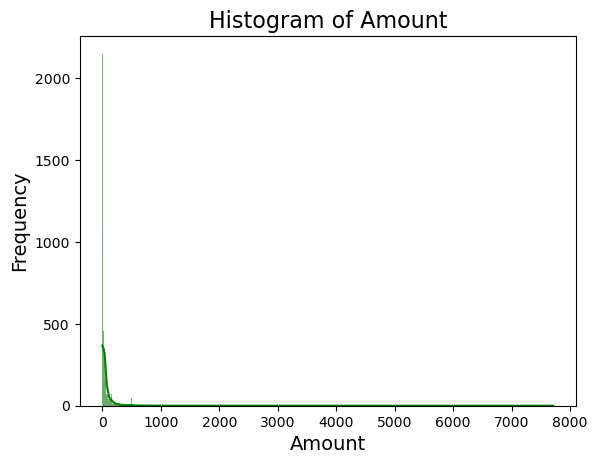

In [227]:
# function for visualize numerical column using histplot
columns_to_plot = [col for col in df.columns if col != 'Class']
for column in columns_to_plot:
    sns.histplot(df[column], kde=True, color="green")
    plt.title(f'Histogram of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()

In [228]:
# checking and handling of outliers

def Checking_and_Handling_Of_Outliers(df, col):
    sns.boxplot(df[col], color = "Red")
    plt.title(f"Boxplot for {col}")
    plt.show()
        
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    LowerTail = q1 - 1.5*iqr
    UpperTail = q3 + 1.5*iqr

    print(f"25% Quantile q1 = {q1}\n75% Quantile q3 = {q3}\nIQR = {iqr}\n")
    print("-"*80)
    print(f"Lower Tail = {LowerTail}\nUpper Tail = {UpperTail}")
    print("-"*80)

    # Checking for Outliers
    Outliers = df[(df[col] < LowerTail) | (df[col] > UpperTail)]
    print("\nOutliers :\n",Outliers)
    print("-"*80)

    #HAndling of Outliers :
    df.loc[df[col] < LowerTail, col] = LowerTail # all outliers less than lowertail, assigned by lowertail value
    df.loc[df[col] > UpperTail, col] = UpperTail # all outliers greater than uppertail, assigned by uppertail value

    print("After handling of Outliers data:\n")
    print(df.head())

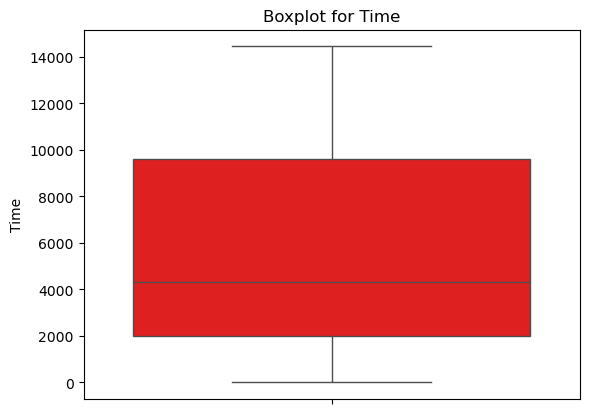

25% Quantile q1 = 1986.0
75% Quantile q3 = 9618.5
IQR = 7632.5

--------------------------------------------------------------------------------
Lower Tail = -9462.75
Upper Tail = 21067.25
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 31 columns]
--------------------------------------------------------------------------------
After handling of Outliers data:

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203

In [229]:
Checking_and_Handling_Of_Outliers(df,'Time')

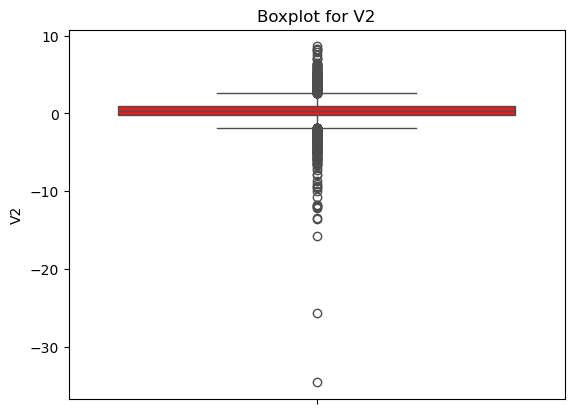

25% Quantile q1 = -0.204709882
75% Quantile q3 = 0.91476489276436
IQR = 1.11947477476436

--------------------------------------------------------------------------------
Lower Tail = -1.88392204414654
Upper Tail = 2.5939770549109
--------------------------------------------------------------------------------

Outliers :
          Time        V1        V2        V3        V4        V5        V6  \
18       14.0 -5.401258 -5.450148  1.186305  1.736239  3.049106 -1.763406   
82       52.0 -3.005237  2.600138  1.483691 -2.418473  0.306326 -0.824575   
85       55.0 -4.575093 -4.429184  3.402585  0.903915  3.002224 -0.491078   
89       59.0 -0.773293 -4.146007 -0.932038  0.027094 -1.698307  0.460188   
146      92.0 -5.285971  4.847323 -1.290368 -1.427842 -0.621533 -0.604691   
...       ...       ...       ...       ...       ...       ...       ...   
9545  14289.0 -6.075310  3.667816 -0.148074  1.116718 -2.149373  0.894274   
9558  14324.0 -0.382982  2.692966 -1.790516  1.789234  0.90

In [230]:
Checking_and_Handling_Of_Outliers(df,'V2')

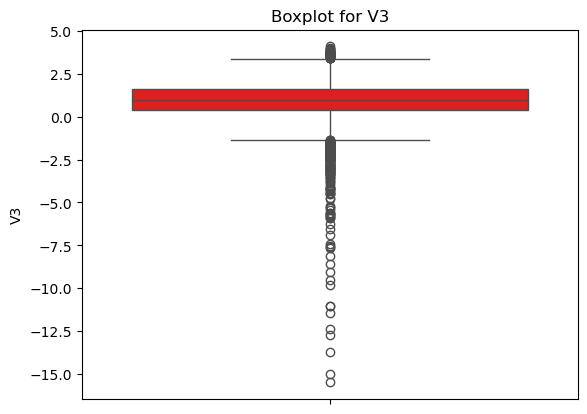

25% Quantile q1 = 0.41006408023679153
75% Quantile q3 = 1.605969645525715
IQR = 1.1959055652889234

--------------------------------------------------------------------------------
Lower Tail = -1.3837942676965937
Upper Tail = 3.3998279934591
--------------------------------------------------------------------------------

Outliers :
          Time        V1        V2        V3        V4        V5         V6  \
85       55.0 -4.575093 -1.883922  3.402585  0.903915  3.002224  -0.491078   
102      69.0  0.298503  2.142722 -1.542143  1.561332  0.938108  -2.145673   
108      73.0  1.162281  1.248178 -1.581317  1.475024  1.138357  -1.020373   
116      75.0 -1.439069  0.267631  3.562770  3.481486 -1.160101   1.764781   
139      85.0 -4.257597  1.649489 -1.591242 -1.374317 -1.180136  -0.331040   
...       ...       ...       ...       ...       ...       ...        ...   
9512  14160.0 -0.874878  2.593977 -9.522894  5.130648  3.099060   1.425837   
9529  14229.0 -1.017880  0.017895  3.79

In [231]:
Checking_and_Handling_Of_Outliers(df,'V3')

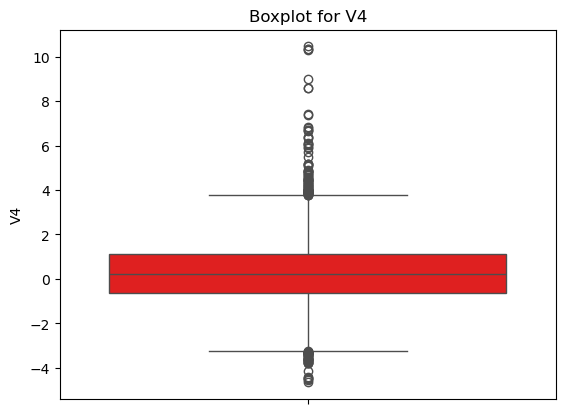

25% Quantile q1 = -0.6270926505000001
75% Quantile q3 = 1.1283276923767098
IQR = 1.75542034287671

--------------------------------------------------------------------------------
Lower Tail = -3.2602231648150646
Upper Tail = 3.7614582066917746
--------------------------------------------------------------------------------

Outliers :
          Time        V1        V2        V3         V4        V5        V6  \
83       53.0 -1.198968 -1.474100  1.840326  -4.515824  0.327567 -0.174469   
174     112.0 -4.816022 -1.883922  0.566006   3.960568 -2.495400  3.691365   
180     117.0  0.805682 -0.220451  2.371310   4.075817 -0.844073  2.546394   
351     259.0 -1.569485 -1.883922  1.249203  -4.434211  1.244282  0.402688   
513     379.0 -1.896099 -1.829046  1.181222   3.897846 -1.686469  1.976371   
...       ...       ...       ...       ...        ...       ...       ...   
9258  13331.0  0.240090  2.593977 -1.383794   5.164172  3.812978  1.571125   
9487  14073.0 -4.153014  2.593977 -1.

In [232]:
Checking_and_Handling_Of_Outliers(df,'V4')

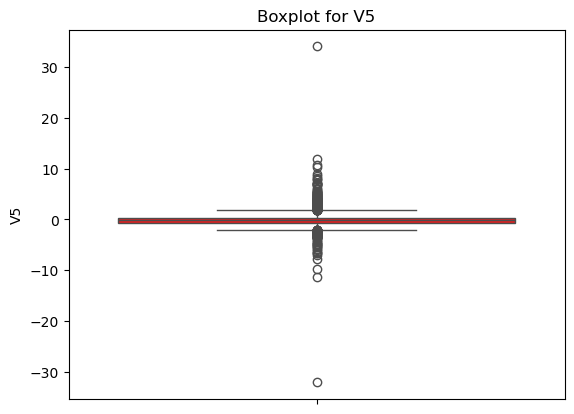

25% Quantile q1 = -0.6396080390000001
75% Quantile q3 = 0.374122868259096
IQR = 1.013730907259096

--------------------------------------------------------------------------------
Lower Tail = -2.160204399888644
Upper Tail = 1.8947192291477402
--------------------------------------------------------------------------------

Outliers :
          Time        V1        V2        V3        V4        V5         V6  \
8         7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599   3.721818   
11       10.0  0.384978  0.616109 -0.874300 -0.094019  2.924584   3.317027   
18       14.0 -5.401258 -1.883922  1.186305  1.736239  3.049106  -1.763406   
24       22.0 -1.946525 -0.044901 -0.405570 -1.013057  2.941968   2.955053   
51       36.0 -1.004929 -0.985978 -0.038039  3.710061 -6.631951   5.122103   
...       ...       ...       ...       ...       ...       ...        ...   
9512  14160.0 -0.874878  2.593977 -1.383794  3.761458  3.099060   1.425837   
9517  14183.0 -0.321211  0.938373  0.8

In [233]:
Checking_and_Handling_Of_Outliers(df,'V5')

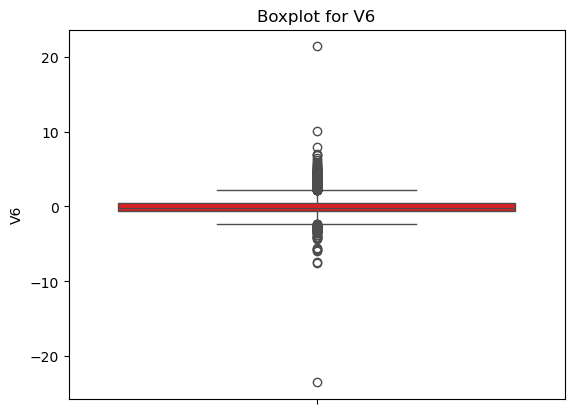

25% Quantile q1 = -0.6421801355000001
75% Quantile q3 = 0.5026154584495885
IQR = 1.1447955939495886

--------------------------------------------------------------------------------
Lower Tail = -2.359373526424383
Upper Tail = 2.2198088493739716
--------------------------------------------------------------------------------

Outliers :
          Time        V1        V2        V3        V4        V5         V6  \
8         7.0 -0.894286  0.286157 -0.113192 -0.271526  1.894719   3.721818   
11       10.0  0.384978  0.616109 -0.874300 -0.094019  1.894719   3.317027   
24       22.0 -1.946525 -0.044901 -0.405570 -1.013057  1.894719   2.955053   
40       32.0  1.249055 -0.624727 -0.710589 -0.991600  1.429973   3.692977   
51       36.0 -1.004929 -0.985978 -0.038039  3.710061 -2.160204   5.122103   
...       ...       ...       ...       ...       ...       ...        ...   
9509  14152.0 -4.710529  2.593977 -1.383794  3.761458 -2.160204  -3.322689   
9517  14183.0 -0.321211  0.938373  0

In [234]:
Checking_and_Handling_Of_Outliers(df,'V6')

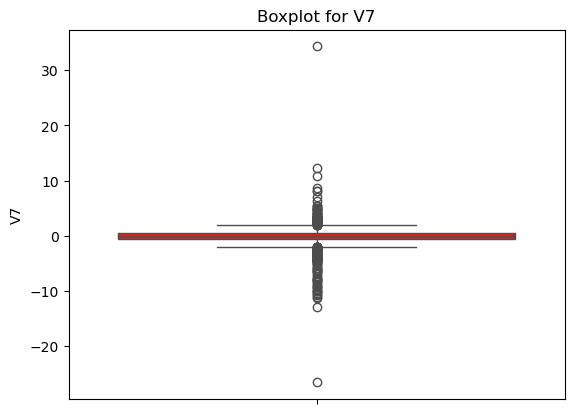

25% Quantile q1 = -0.5288199929999999
75% Quantile q3 = 0.4858413562034945
IQR = 1.0146613492034944

--------------------------------------------------------------------------------
Lower Tail = -2.0508120168052413
Upper Tail = 2.0078333800087362
--------------------------------------------------------------------------------

Outliers :
          Time        V1        V2        V3        V4        V5        V6  \
51       36.0 -1.004929 -0.985978 -0.038039  3.710061 -2.160204  2.219809   
82       52.0 -3.005237  2.593977  1.483691 -2.418473  0.306326 -0.824575   
85       55.0 -4.575093 -1.883922  3.399828  0.903915  1.894719 -0.491078   
140      87.0 -5.101877  1.897022 -1.383794 -1.277543 -2.160204  2.098366   
150      93.0 -1.640014 -0.479831  1.613630  2.997979 -2.160204  2.219809   
...       ...       ...       ...       ...       ...       ...       ...   
9487  14073.0 -4.153014  2.593977 -1.383794  3.761458 -2.160204 -2.359374   
9509  14152.0 -4.710529  2.593977 -1.383794

In [235]:
Checking_and_Handling_Of_Outliers(df,'V7')

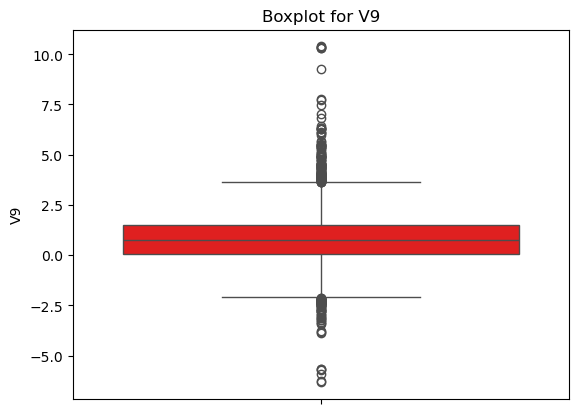

25% Quantile q1 = 0.0499013464128564
75% Quantile q3 = 1.48314961258322
IQR = 1.4332482661703636

--------------------------------------------------------------------------------
Lower Tail = -2.099971052842689
Upper Tail = 3.633022011838765
--------------------------------------------------------------------------------

Outliers :
          Time        V1        V2        V3        V4        V5        V6  \
82       52.0 -3.005237  2.593977  1.483691 -2.418473  0.306326 -0.824575   
225     147.0 -2.687978  2.593977 -1.383794  0.360829  1.310192 -1.645253   
321     235.0 -0.663511 -0.044443  1.029253 -2.498072 -1.350085 -0.798774   
362     266.0 -2.564961  2.470985  2.649417 -1.564256  1.794297 -0.614742   
541     406.0 -2.312227  1.951992 -1.383794  3.761458 -0.522188 -1.426545   
...       ...       ...       ...       ...       ...       ...       ...   
9496  14105.0 -5.353758  2.593977  0.167299  1.134573 -1.824457  0.958848   
9509  14152.0 -4.710529  2.593977 -1.383794  3.7

In [236]:
Checking_and_Handling_Of_Outliers(df,'V9')

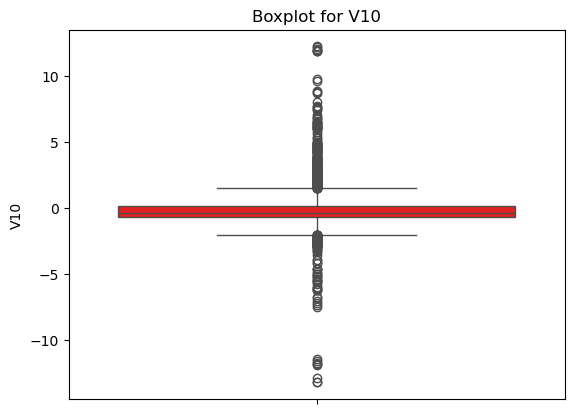

25% Quantile q1 = -0.689234754
75% Quantile q3 = 0.190118299122289
IQR = 0.8793530531222891

--------------------------------------------------------------------------------
Lower Tail = -2.008264333683434
Upper Tail = 1.5091478788057227
--------------------------------------------------------------------------------

Outliers :
          Time        V1        V2        V3        V4        V5        V6  \
10       10.0  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152   
19       15.0  1.492936 -1.029346  0.454795 -1.438026 -1.555434 -0.720961   
74       48.0 -1.793406  1.854604  0.979514  1.112262 -0.206403 -0.199546   
82       52.0 -3.005237  2.593977  1.483691 -2.418473  0.306326 -0.824575   
105      69.0 -2.220642  1.029181 -0.697724 -1.268226  1.894719  2.219809   
...       ...       ...       ...       ...       ...       ...       ...   
9545  14289.0 -6.075310  2.593977 -0.148074  1.116718 -2.149373  0.894274   
9569  14371.0  0.726386 -1.719333  1.523582 -1.01435

In [237]:
Checking_and_Handling_Of_Outliers(df,'V10')

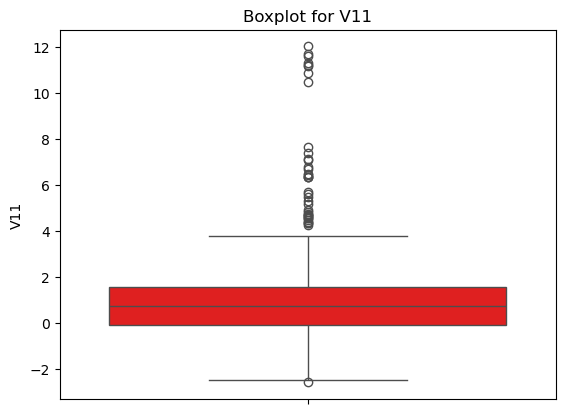

25% Quantile q1 = -0.081190021
75% Quantile q3 = 1.5477053499195899
IQR = 1.62889537091959

--------------------------------------------------------------------------------
Lower Tail = -2.5245330773793846
Upper Tail = 3.9910484062989746
--------------------------------------------------------------------------------

Outliers :
          Time        V1        V2        V3        V4        V5        V6  \
2738   2271.0 -2.688341  2.019022  0.247050  1.447319 -1.464845  1.059599   
4895   4429.0 -5.043472  2.593977  1.999942 -3.260223  1.755487 -0.376547   
6108   6986.0 -4.397974  1.358367 -1.383794  2.679787 -1.128131 -1.706536   
6331   7526.0  0.008430  2.593977 -1.383794  3.761458  0.768307 -2.359374   
6334   7535.0  0.026779  2.593977 -1.383794  3.761458  1.329666 -2.359374   
6336   7543.0  0.329594  2.593977 -1.383794  3.761458  1.667359 -2.359374   
6338   7551.0  0.316459  2.593977 -1.383794  3.761458  1.554026 -2.359374   
6427   7610.0  0.725646  2.300894 -1.383794  3.76145

In [238]:
Checking_and_Handling_Of_Outliers(df,'V11')

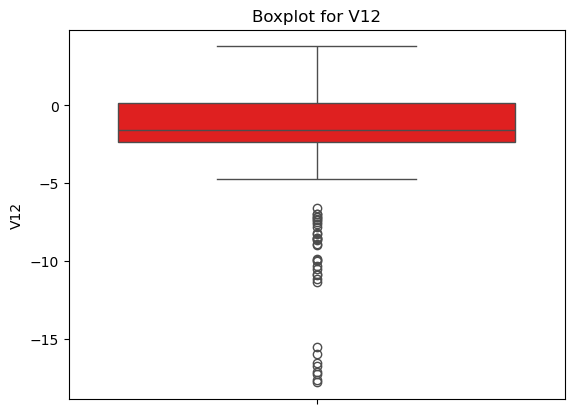

25% Quantile q1 = -2.3558615005
75% Quantile q3 = 0.1185354327509455
IQR = 2.4743969332509455

--------------------------------------------------------------------------------
Lower Tail = -6.067456900376419
Upper Tail = 3.8301308326273635
--------------------------------------------------------------------------------

Outliers :
          Time        V1        V2        V3        V4        V5        V6  \
4920   4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108   6986.0 -4.397974  1.358367 -1.383794  2.679787 -1.128131 -1.706536   
6331   7526.0  0.008430  2.593977 -1.383794  3.761458  0.768307 -2.359374   
6334   7535.0  0.026779  2.593977 -1.383794  3.761458  1.329666 -2.359374   
6336   7543.0  0.329594  2.593977 -1.383794  3.761458  1.667359 -2.359374   
6338   7551.0  0.316459  2.593977 -1.383794  3.761458  1.554026 -2.359374   
6427   7610.0  0.725646  2.300894 -1.383794  3.761458 -1.730411 -1.732193   
6446   7672.0  0.702710  2.426433 -1.383794  3.761

In [239]:
Checking_and_Handling_Of_Outliers(df,'V12')

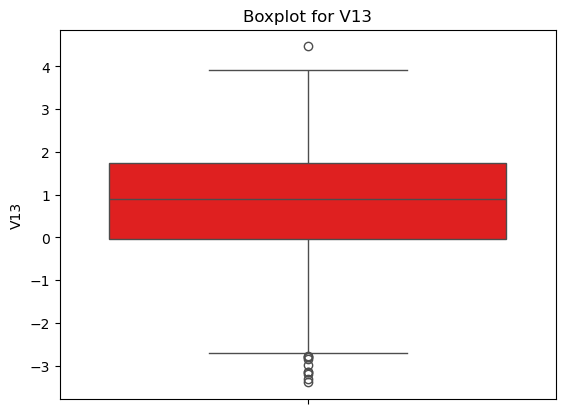

25% Quantile q1 = -0.046181598500000004
75% Quantile q3 = 1.74732527933482
IQR = 1.79350687783482

--------------------------------------------------------------------------------
Lower Tail = -2.73644191525223
Upper Tail = 4.43758559608705
--------------------------------------------------------------------------------

Outliers :
         Time         V1        V2        V3        V4        V5        V6  \
1287   997.0  -0.585360  0.396461  2.684421  1.418844 -0.246061  1.210571   
1465  1139.0   0.911963 -0.601018  1.208046  1.730688 -1.077334  0.748915   
1780  1380.0  -1.501788  1.162644  1.145454 -1.534364 -0.715808 -0.987540   
2188  1705.0   1.125210 -0.419272  0.602481  0.220691 -0.861481 -0.172803   
2284  1828.0   1.086320 -0.508075  0.572893  0.240284 -0.911950 -0.173801   
2305  1848.0   1.123803 -0.517305  0.351660  0.114754 -0.646734  0.132072   
2767  2308.0   1.099126 -0.138431  0.598548  1.351662 -0.500632  0.269538   
2973  2517.0   0.994915 -0.350750  0.481429  0.73

In [240]:
Checking_and_Handling_Of_Outliers(df,'V13')

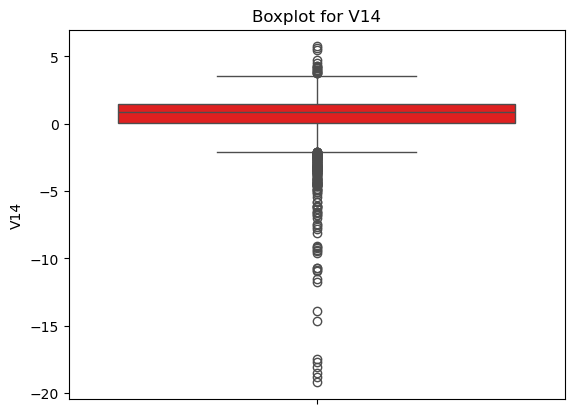

25% Quantile q1 = 0.05971920452381625
75% Quantile q3 = 1.4801413149818
IQR = 1.4204221104579837

--------------------------------------------------------------------------------
Lower Tail = -2.0709139611631593
Upper Tail = 3.6107744806687756
--------------------------------------------------------------------------------

Outliers :
          Time        V1        V2        V3        V4        V5        V6  \
82       52.0 -3.005237  2.593977  1.483691 -2.418473  0.306326 -0.824575   
102      69.0  0.298503  2.142722 -1.383794  1.561332  0.938108 -2.145673   
104      69.0 -1.766645  2.352984 -0.009955 -0.363736  1.460953 -0.204833   
108      73.0  1.162281  1.248178 -1.383794  1.475024  1.138357 -1.020373   
190     125.0 -2.807065  1.183098  2.974779  2.801477 -0.475110  2.219809   
...       ...       ...       ...       ...       ...       ...       ...   
9509  14152.0 -4.710529  2.593977 -1.383794  3.761458 -2.160204 -2.359374   
9512  14160.0 -0.874878  2.593977 -1.383794  3

In [241]:
Checking_and_Handling_Of_Outliers(df,'V14')

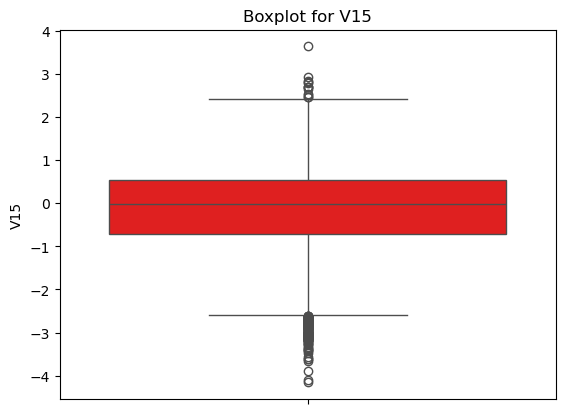

25% Quantile q1 = -0.721263518
75% Quantile q3 = 0.5394602239173265
IQR = 1.2607237419173265

--------------------------------------------------------------------------------
Lower Tail = -2.61234913087599
Upper Tail = 2.4305458367933164
--------------------------------------------------------------------------------

Outliers :
          Time        V1        V2        V3        V4        V5        V6  \
218     144.0 -1.032940  0.680608  1.402550 -0.529928  0.869578  1.903301   
306     221.0 -0.342871 -0.199546  1.976353 -0.003495 -1.170366  0.883501   
455     333.0 -2.977214  0.781748  2.881724 -1.627798 -1.368067  1.656876   
529     393.0 -2.595500  1.311592  1.323081 -1.127849  0.307467 -0.518202   
585     438.0  1.287087 -0.392364  0.513360 -1.237322 -0.402556  0.474908   
...       ...       ...       ...       ...       ...       ...       ...   
9110  12836.0 -0.964034 -0.241693  3.399828  0.010621 -0.787341  1.166953   
9161  13077.0 -1.544738  0.117770  3.212677  1.18002

In [242]:
Checking_and_Handling_Of_Outliers(df,'V15')

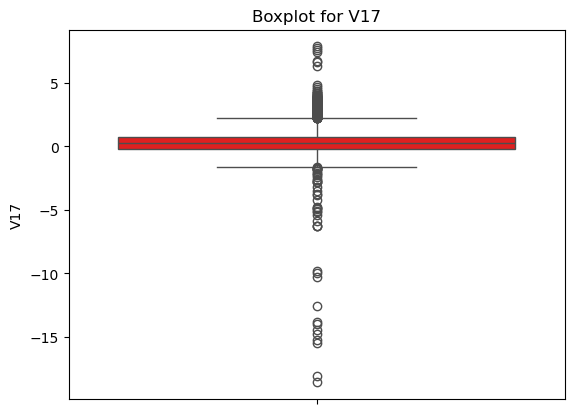

25% Quantile q1 = -0.190167435
75% Quantile q3 = 0.7829534723825671
IQR = 0.9731209073825671

--------------------------------------------------------------------------------
Lower Tail = -1.6498487960738506
Upper Tail = 2.2426348334564175
--------------------------------------------------------------------------------

Outliers :
          Time        V1        V2        V3        V4        V5        V6  \
82       52.0 -3.005237  2.593977  1.483691 -2.418473  0.306326 -0.824575   
102      69.0  0.298503  2.142722 -1.383794  1.561332  0.938108 -2.145673   
108      73.0  1.162281  1.248178 -1.383794  1.475024  1.138357 -1.020373   
362     266.0 -2.564961  2.470985  2.649417 -1.564256  1.794297 -0.614742   
396     288.0 -0.598820  0.073254 -0.113786 -2.315189  1.644382  2.219809   
...       ...       ...       ...       ...       ...       ...       ...   
9512  14160.0 -0.874878  2.593977 -1.383794  3.761458  1.894719  1.425837   
9558  14324.0 -0.382982  2.593977 -1.383794  1.789

In [243]:
Checking_and_Handling_Of_Outliers(df,'V17')

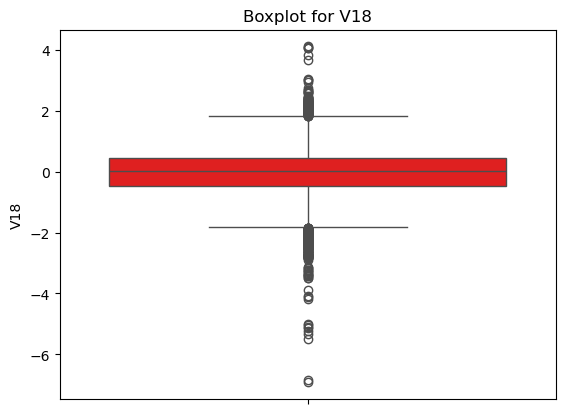

25% Quantile q1 = -0.4586742675
75% Quantile q3 = 0.459773080430874
IQR = 0.918447347930874

--------------------------------------------------------------------------------
Lower Tail = -1.836345289396311
Upper Tail = 1.837444102327185
--------------------------------------------------------------------------------

Outliers :
          Time        V1        V2        V3        V4        V5        V6  \
3         1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
38       29.0  0.996370 -0.122589  0.546819  0.706580  0.134560  1.156995   
48       35.0  1.386397 -0.794209  0.778224 -0.864708 -1.064132  0.351296   
68       44.0  0.927060 -0.323684  0.387585  0.544474  0.246787  1.650358   
96       64.0  0.959602  0.370711  0.888613  2.343244  0.352491  1.365515   
...       ...       ...       ...       ...       ...       ...       ...   
9495  14102.0 -1.190827  2.593977 -1.383794  1.382416  0.637673 -0.508074   
9509  14152.0 -4.710529  2.593977 -1.383794  3.761458

In [244]:
Checking_and_Handling_Of_Outliers(df,'V18')

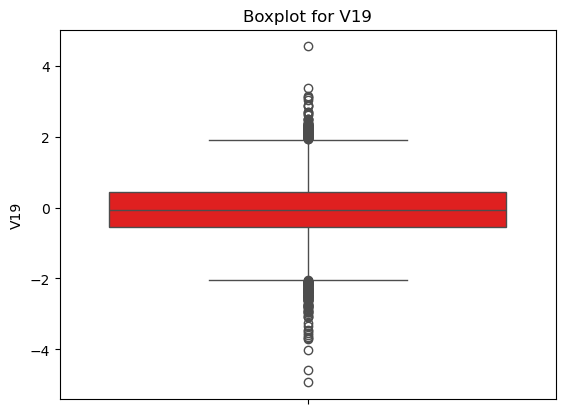

25% Quantile q1 = -0.5487316025
75% Quantile q3 = 0.4480960020538825
IQR = 0.9968276045538824

--------------------------------------------------------------------------------
Lower Tail = -2.0439730093308235
Upper Tail = 1.9433374088847062
--------------------------------------------------------------------------------

Outliers :
          Time        V1        V2        V3        V4        V5        V6  \
2         1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
14       12.0 -2.791855 -0.327771  1.641750  1.767473 -0.136588  0.807596   
23       18.0  0.247491  0.277666  1.185471 -0.092603 -1.314394 -0.150116   
96       64.0  0.959602  0.370711  0.888613  2.343244  0.352491  1.365515   
150      93.0 -1.640014 -0.479831  1.613630  2.997979 -2.160204  2.219809   
...       ...       ...       ...       ...       ...       ...       ...   
9406  13811.0 -1.128439  0.500080  0.944119  0.764643  0.644945 -0.573535   
9513  14170.0 -2.332130 -0.321939  2.503493 -0.99

In [245]:
Checking_and_Handling_Of_Outliers(df,'V19')

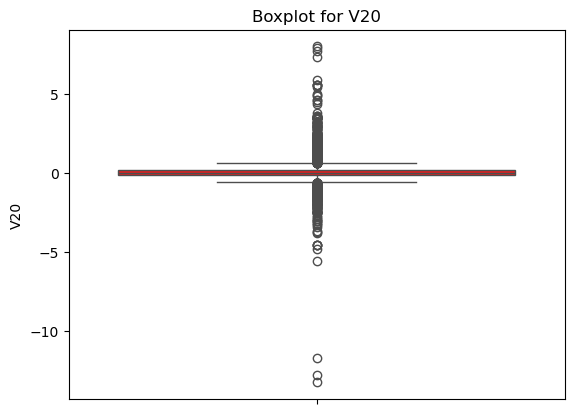

25% Quantile q1 = -0.149920445
75% Quantile q3 = 0.1599869258034115
IQR = 0.3099073708034115

--------------------------------------------------------------------------------
Lower Tail = -0.6147815012051173
Upper Tail = 0.6248479820085289
--------------------------------------------------------------------------------

Outliers :
          Time        V1        V2        V3        V4        V5        V6  \
14       12.0 -2.791855 -0.327771  1.641750  1.767473 -0.136588  0.807596   
18       14.0 -5.401258 -1.883922  1.186305  1.736239  1.894719 -1.763406   
74       48.0 -1.793406  1.854604  0.979514  1.112262 -0.206403 -0.199546   
82       52.0 -3.005237  2.593977  1.483691 -2.418473  0.306326 -0.824575   
83       53.0 -1.198968 -1.474100  1.840326 -3.260223  0.327567 -0.174469   
...       ...       ...       ...       ...       ...       ...       ...   
9531  14233.0  0.133927 -1.782693 -0.346214  0.839726 -1.153574 -1.096941   
9563  14338.0 -1.803279  0.101064  1.509077 -0.760

In [246]:
Checking_and_Handling_Of_Outliers(df,'V20')

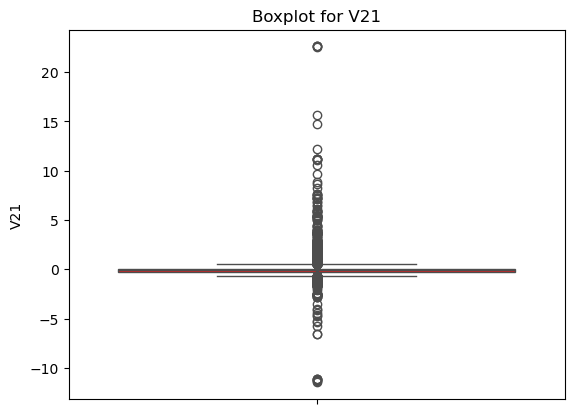

25% Quantile q1 = -0.2699867205
75% Quantile q3 = 0.033095942653286206
IQR = 0.3030826631532862

--------------------------------------------------------------------------------
Lower Tail = -0.7246107152299293
Upper Tail = 0.4877199373832155
--------------------------------------------------------------------------------

Outliers :
          Time        V1        V2        V3        V4        V5        V6  \
7         7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118   
14       12.0 -2.791855 -0.327771  1.641750  1.767473 -0.136588  0.807596   
15       12.0 -0.752417  0.345485  2.057323 -1.468643 -1.158394 -0.077850   
23       18.0  0.247491  0.277666  1.185471 -0.092603 -1.314394 -0.150116   
47       34.0  0.201686  0.497483  1.373913  0.571405 -0.630658 -0.539659   
...       ...       ...       ...       ...       ...       ...       ...   
9558  14324.0 -0.382982  2.593977 -1.383794  1.789234  0.905397 -1.316690   
9563  14338.0 -1.803279  0.101064  1.509077 -0.

In [247]:
Checking_and_Handling_Of_Outliers(df,'V21')

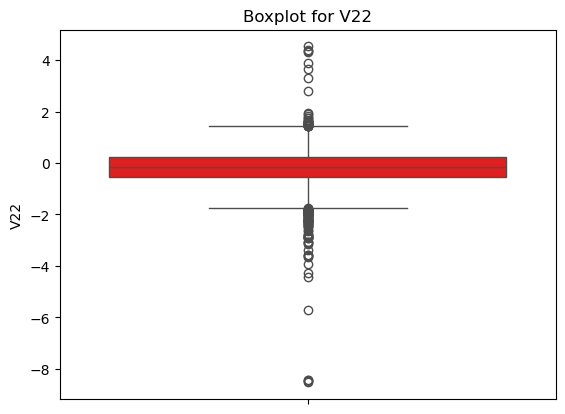

25% Quantile q1 = -0.5540625575
75% Quantile q3 = 0.2405448745763215
IQR = 0.7946074320763215

--------------------------------------------------------------------------------
Lower Tail = -1.7459737056144822
Upper Tail = 1.4324560226908036
--------------------------------------------------------------------------------

Outliers :
          Time        V1        V2        V3        V4        V5        V6  \
160     100.0 -0.378602  0.274579 -0.129488 -2.682799 -0.731375 -0.226354   
164     103.0 -6.093248 -1.883922 -1.383794  3.294389 -1.413792  2.219809   
190     125.0 -2.807065  1.183098  2.974779  2.801477 -0.475110  2.219809   
274     194.0 -0.773296 -0.190661  2.404946 -1.799881 -0.396516  0.199218   
417     302.0 -0.986171  1.732934  0.857587  0.178950 -0.794223 -0.088469   
...       ...       ...       ...       ...       ...       ...       ...   
8802  12004.0 -5.666073  2.593977 -1.383794  0.154057 -0.546173  1.671413   
8820  12043.0 -6.223501  2.593977 -1.383794  0.13

In [248]:
Checking_and_Handling_Of_Outliers(df,'V22')

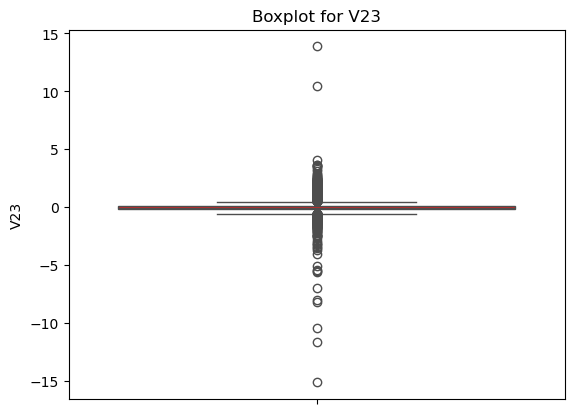

25% Quantile q1 = -0.1776009
75% Quantile q3 = 0.08336383190079165
IQR = 0.26096473190079167

--------------------------------------------------------------------------------
Lower Tail = -0.5690479978511875
Upper Tail = 0.47481092975197914
--------------------------------------------------------------------------------

Outliers :
          Time        V1        V2        V3        V4        V5        V6  \
2         1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
14       12.0 -2.791855 -0.327771  1.641750  1.767473 -0.136588  0.807596   
18       14.0 -5.401258 -1.883922  1.186305  1.736239  1.894719 -1.763406   
24       22.0 -1.946525 -0.044901 -0.405570 -1.013057  1.894719  2.219809   
25       22.0 -2.074295 -0.121482  1.322021  0.410008  0.295198 -0.959537   
...       ...       ...       ...       ...       ...       ...       ...   
9568  14367.0 -0.939118  2.593977 -1.383794  1.771850  0.545432 -1.387188   
9601  14432.0 -2.250324 -1.875670 -1.383794  1.27

In [249]:
Checking_and_Handling_Of_Outliers(df,'V23')

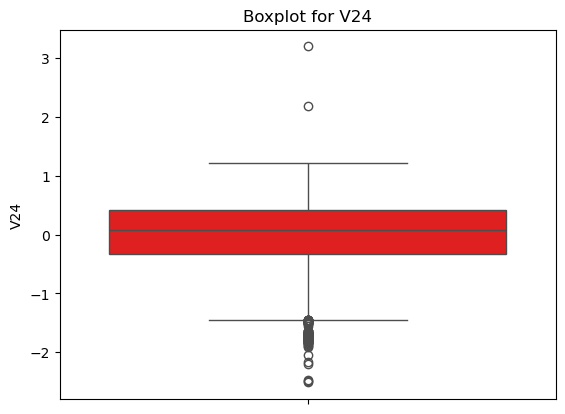

25% Quantile q1 = -0.330584649
75% Quantile q3 = 0.412687947726163
IQR = 0.7432725967261631

--------------------------------------------------------------------------------
Lower Tail = -1.4454935440892447
Upper Tail = 1.5275968428154076
--------------------------------------------------------------------------------

Outliers :
          Time        V1        V2        V3        V4        V5        V6  \
183     118.0  1.431053 -0.648101 -0.331664 -1.207383 -0.012786  0.704440   
218     144.0 -1.032940  0.680608  1.402550 -0.529928  0.869578  1.903301   
220     145.0 -2.420413  1.947885  0.553646  0.983069 -0.281518  2.219809   
221     145.0 -2.420413  1.947885  0.553646  0.983069 -0.281518  2.219809   
222     145.0 -2.419486  1.949346  0.552998  0.982710 -0.284815  2.219809   
...       ...       ...       ...       ...       ...       ...       ...   
9485  14065.0 -0.652782  0.541716  1.211630 -0.862459  0.877975  0.906071   
9495  14102.0 -1.190827  2.593977 -1.383794  1.3824

In [250]:
Checking_and_Handling_Of_Outliers(df,'V24')

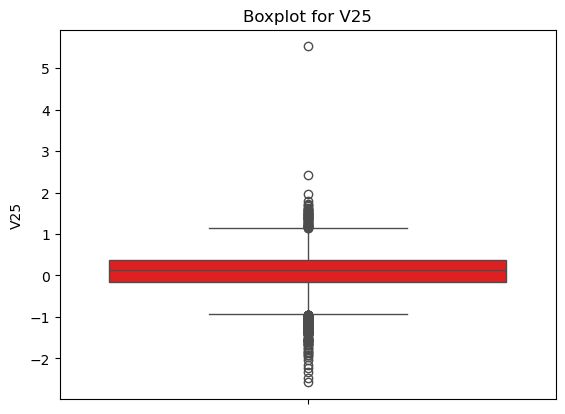

25% Quantile q1 = -0.159894939
75% Quantile q3 = 0.36081474209820197
IQR = 0.5207096810982019

--------------------------------------------------------------------------------
Lower Tail = -0.9409594606473028
Upper Tail = 1.1418792637455049
--------------------------------------------------------------------------------

Outliers :
          Time        V1        V2        V3        V4        V5        V6  \
52       36.0 -1.169422  1.158314  1.406800  0.860189 -0.103810  0.122035   
55       38.0  0.158332  0.872687  0.965525  1.802127  0.139022  0.110863   
64       42.0 -0.522666  1.009923  0.276470  1.475289 -0.707013  0.355243   
134      83.0 -1.897331  0.955626  0.052543  1.276656 -2.160204  2.219809   
238     158.0 -0.159985 -0.611633  2.081419 -1.048128 -1.083456  0.254357   
...       ...       ...       ...       ...       ...       ...       ...   
9299  13470.0 -0.669768  0.087795  1.964951  0.229959  0.248676 -0.161082   
9350  13596.0 -1.857144  1.324807  1.593341 -0.10

In [251]:
Checking_and_Handling_Of_Outliers(df,'V25')

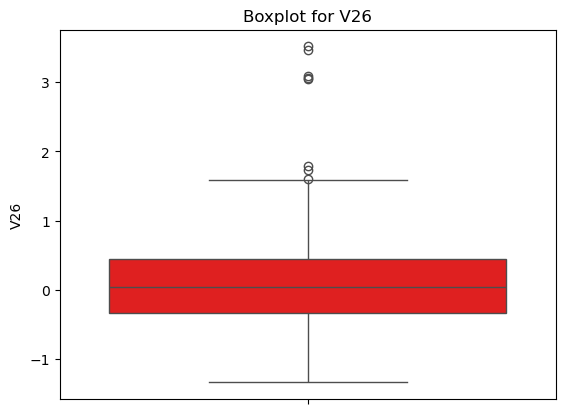

25% Quantile q1 = -0.3321350165
75% Quantile q3 = 0.437725544587729
IQR = 0.7698605610877289

--------------------------------------------------------------------------------
Lower Tail = -1.4869258581315936
Upper Tail = 1.5925163862193226
--------------------------------------------------------------------------------

Outliers :
          Time         V1        V2        V3        V4        V5        V6  \
69       46.0  -1.923213 -0.870482  2.320170  1.988776  0.417091 -0.380014   
723     547.0   1.066851 -0.464679  1.984353  1.521834 -1.287325  1.113014   
1480   1156.0  -1.176271  0.091708  1.551962  1.628364  0.407879  1.468424   
6057   6863.0  -0.861331 -0.414689  2.323476  2.065589  0.281210  1.635029   
6743   8467.0   1.230752  0.235567  0.671605  1.327775 -0.263994 -0.290141   
6880   8802.0  -0.411014  0.189710  1.573206 -0.285105  0.385355  0.328088   
8610  11621.0 -27.670569 -1.883922  2.243079  3.761458  1.894719 -2.359374   
8801  12003.0  -2.160389 -1.883922  2.1740

In [252]:
Checking_and_Handling_Of_Outliers(df,'V26')

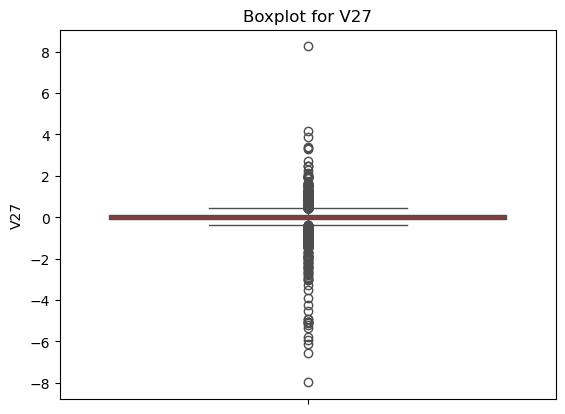

25% Quantile q1 = -0.0832766425
75% Quantile q3 = 0.12531930214994852
IQR = 0.20859594464994852

--------------------------------------------------------------------------------
Lower Tail = -0.39617055947492275
Upper Tail = 0.43821321912487127
--------------------------------------------------------------------------------

Outliers :
          Time        V1        V2        V3        V4        V5        V6  \
7         7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118   
24       22.0 -1.946525 -0.044901 -0.405570 -1.013057  1.894719  2.219809   
51       36.0 -1.004929 -0.985978 -0.038039  3.710061 -2.160204  2.219809   
52       36.0 -1.169422  1.158314  1.406800  0.860189 -0.103810  0.122035   
66       44.0 -0.714764  0.514969  1.821676  0.616434  0.848776 -0.111938   
...       ...       ...       ...       ...       ...       ...       ...   
9563  14338.0 -1.803279  0.101064  1.509077 -0.760388 -1.766393  0.644461   
9592  14427.0 -0.436985  0.647157  1.829696 -

In [253]:
Checking_and_Handling_Of_Outliers(df,'V27')

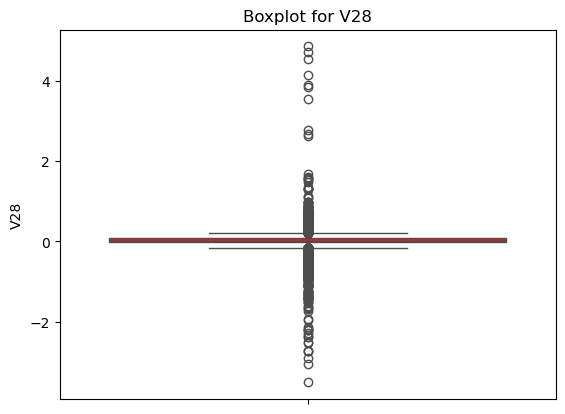

25% Quantile q1 = -0.0161148755
75% Quantile q3 = 0.0786487967603615
IQR = 0.0947636722603615

--------------------------------------------------------------------------------
Lower Tail = -0.15826038389054226
Upper Tail = 0.22079430515090376
--------------------------------------------------------------------------------

Outliers :
          Time        V1        V2        V3        V4        V5        V6  \
7         7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118   
18       14.0 -5.401258 -1.883922  1.186305  1.736239  1.894719 -1.763406   
23       18.0  0.247491  0.277666  1.185471 -0.092603 -1.314394 -0.150116   
25       22.0 -2.074295 -0.121482  1.322021  0.410008  0.295198 -0.959537   
36       27.0 -0.246046  0.473267  1.695738  0.262411 -0.010866 -0.610836   
...       ...       ...       ...       ...       ...       ...       ...   
9592  14427.0 -0.436985  0.647157  1.829696 -0.586624 -0.005800  0.404003   
9601  14432.0 -2.250324 -1.875670 -1.383794  1.

In [254]:
Checking_and_Handling_Of_Outliers(df,'V28')

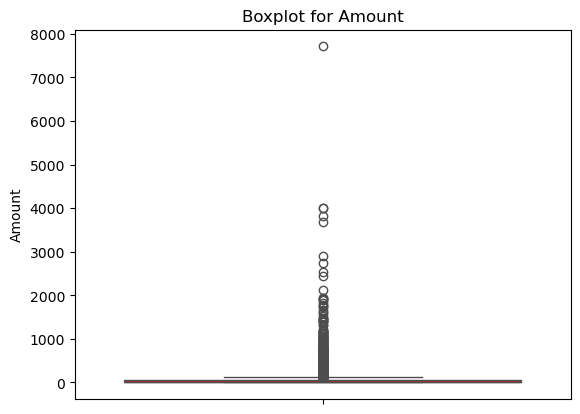

25% Quantile q1 = 5.0
75% Quantile q3 = 52.0
IQR = 47.0

--------------------------------------------------------------------------------
Lower Tail = -65.5
Upper Tail = 122.5
--------------------------------------------------------------------------------

Outliers :
          Time        V1        V2        V3        V4        V5        V6  \
0         0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
2         1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3         1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
20       16.0  0.694885 -1.361819  1.029221  0.834159 -1.191209  1.309109   
51       36.0 -1.004929 -0.985978 -0.038039  3.710061 -2.160204  2.219809   
...       ...       ...       ...       ...       ...       ...       ...   
9563  14338.0 -1.803279  0.101064  1.509077 -0.760388 -1.766393  0.644461   
9565  14355.0 -0.987948 -1.883922  0.297985  3.551207 -1.520072  1.522722   
9569  14371.0  0.726386 -1.719333  1.

In [255]:
Checking_and_Handling_Of_Outliers(df,'Amount')

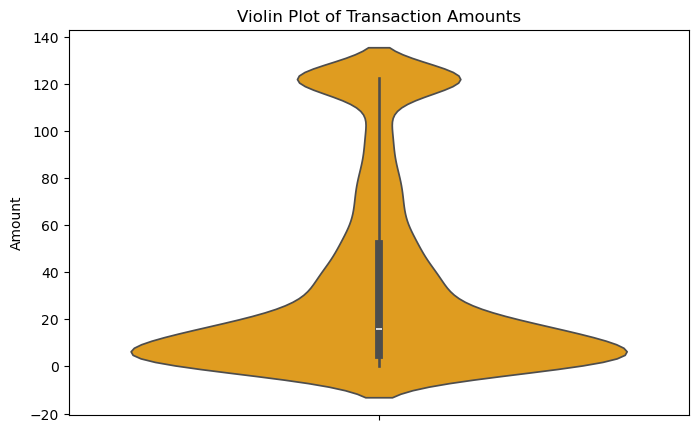

In [256]:
# 2. Violin Plot for Amount Distribution
plt.figure(figsize=(8, 5))
sns.violinplot(y=df['Amount'], color="orange")
plt.title("Violin Plot of Transaction Amounts")
plt.ylabel("Amount")
plt.show()

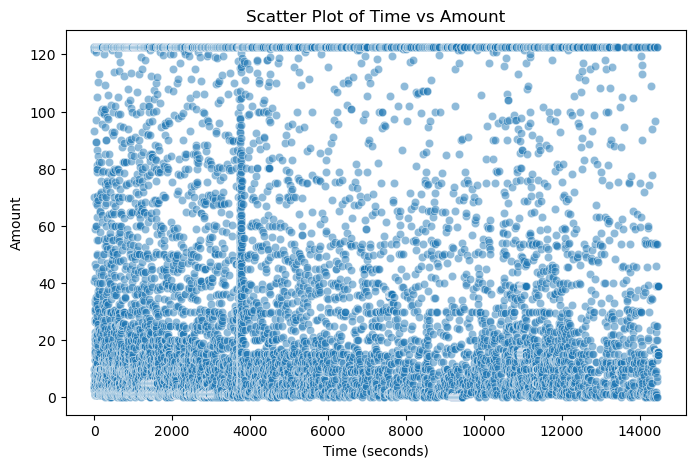

In [257]:
# 1. Scatter plot of two numerical variables
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Time'], y=df['Amount'], alpha=0.5)
plt.title("Scatter Plot of Time vs Amount")
plt.xlabel("Time (seconds)")
plt.ylabel("Amount")
plt.show()

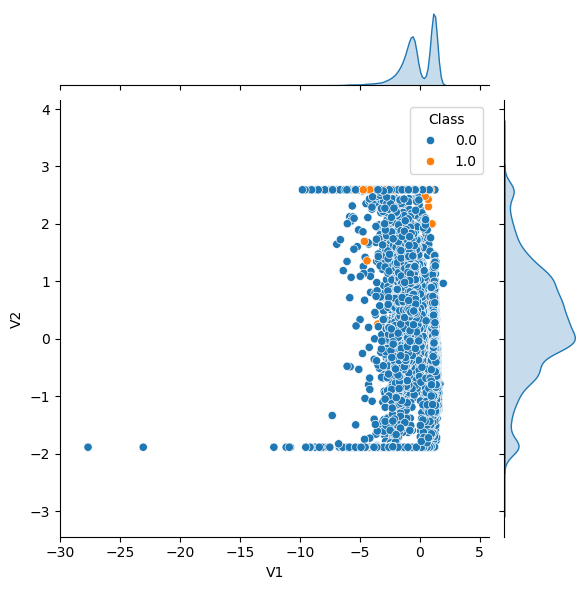

In [258]:
# 4. Jointplot (Scatter + Histograms)
sns.jointplot(x="V1", y="V2", data=df, kind="scatter", hue="Class")
plt.show()

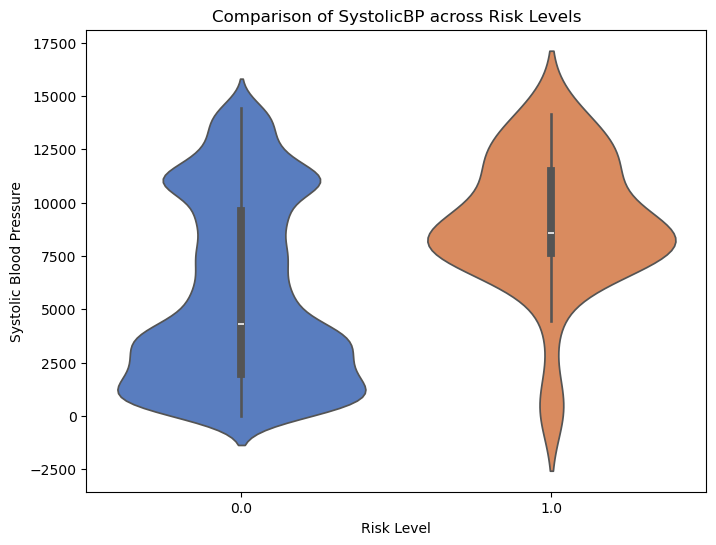

In [259]:
# visualize violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x="Class", y="Time", palette="muted")
plt.title("Comparison of SystolicBP across Risk Levels")
plt.xlabel("Risk Level")
plt.ylabel("Systolic Blood Pressure")
plt.show()

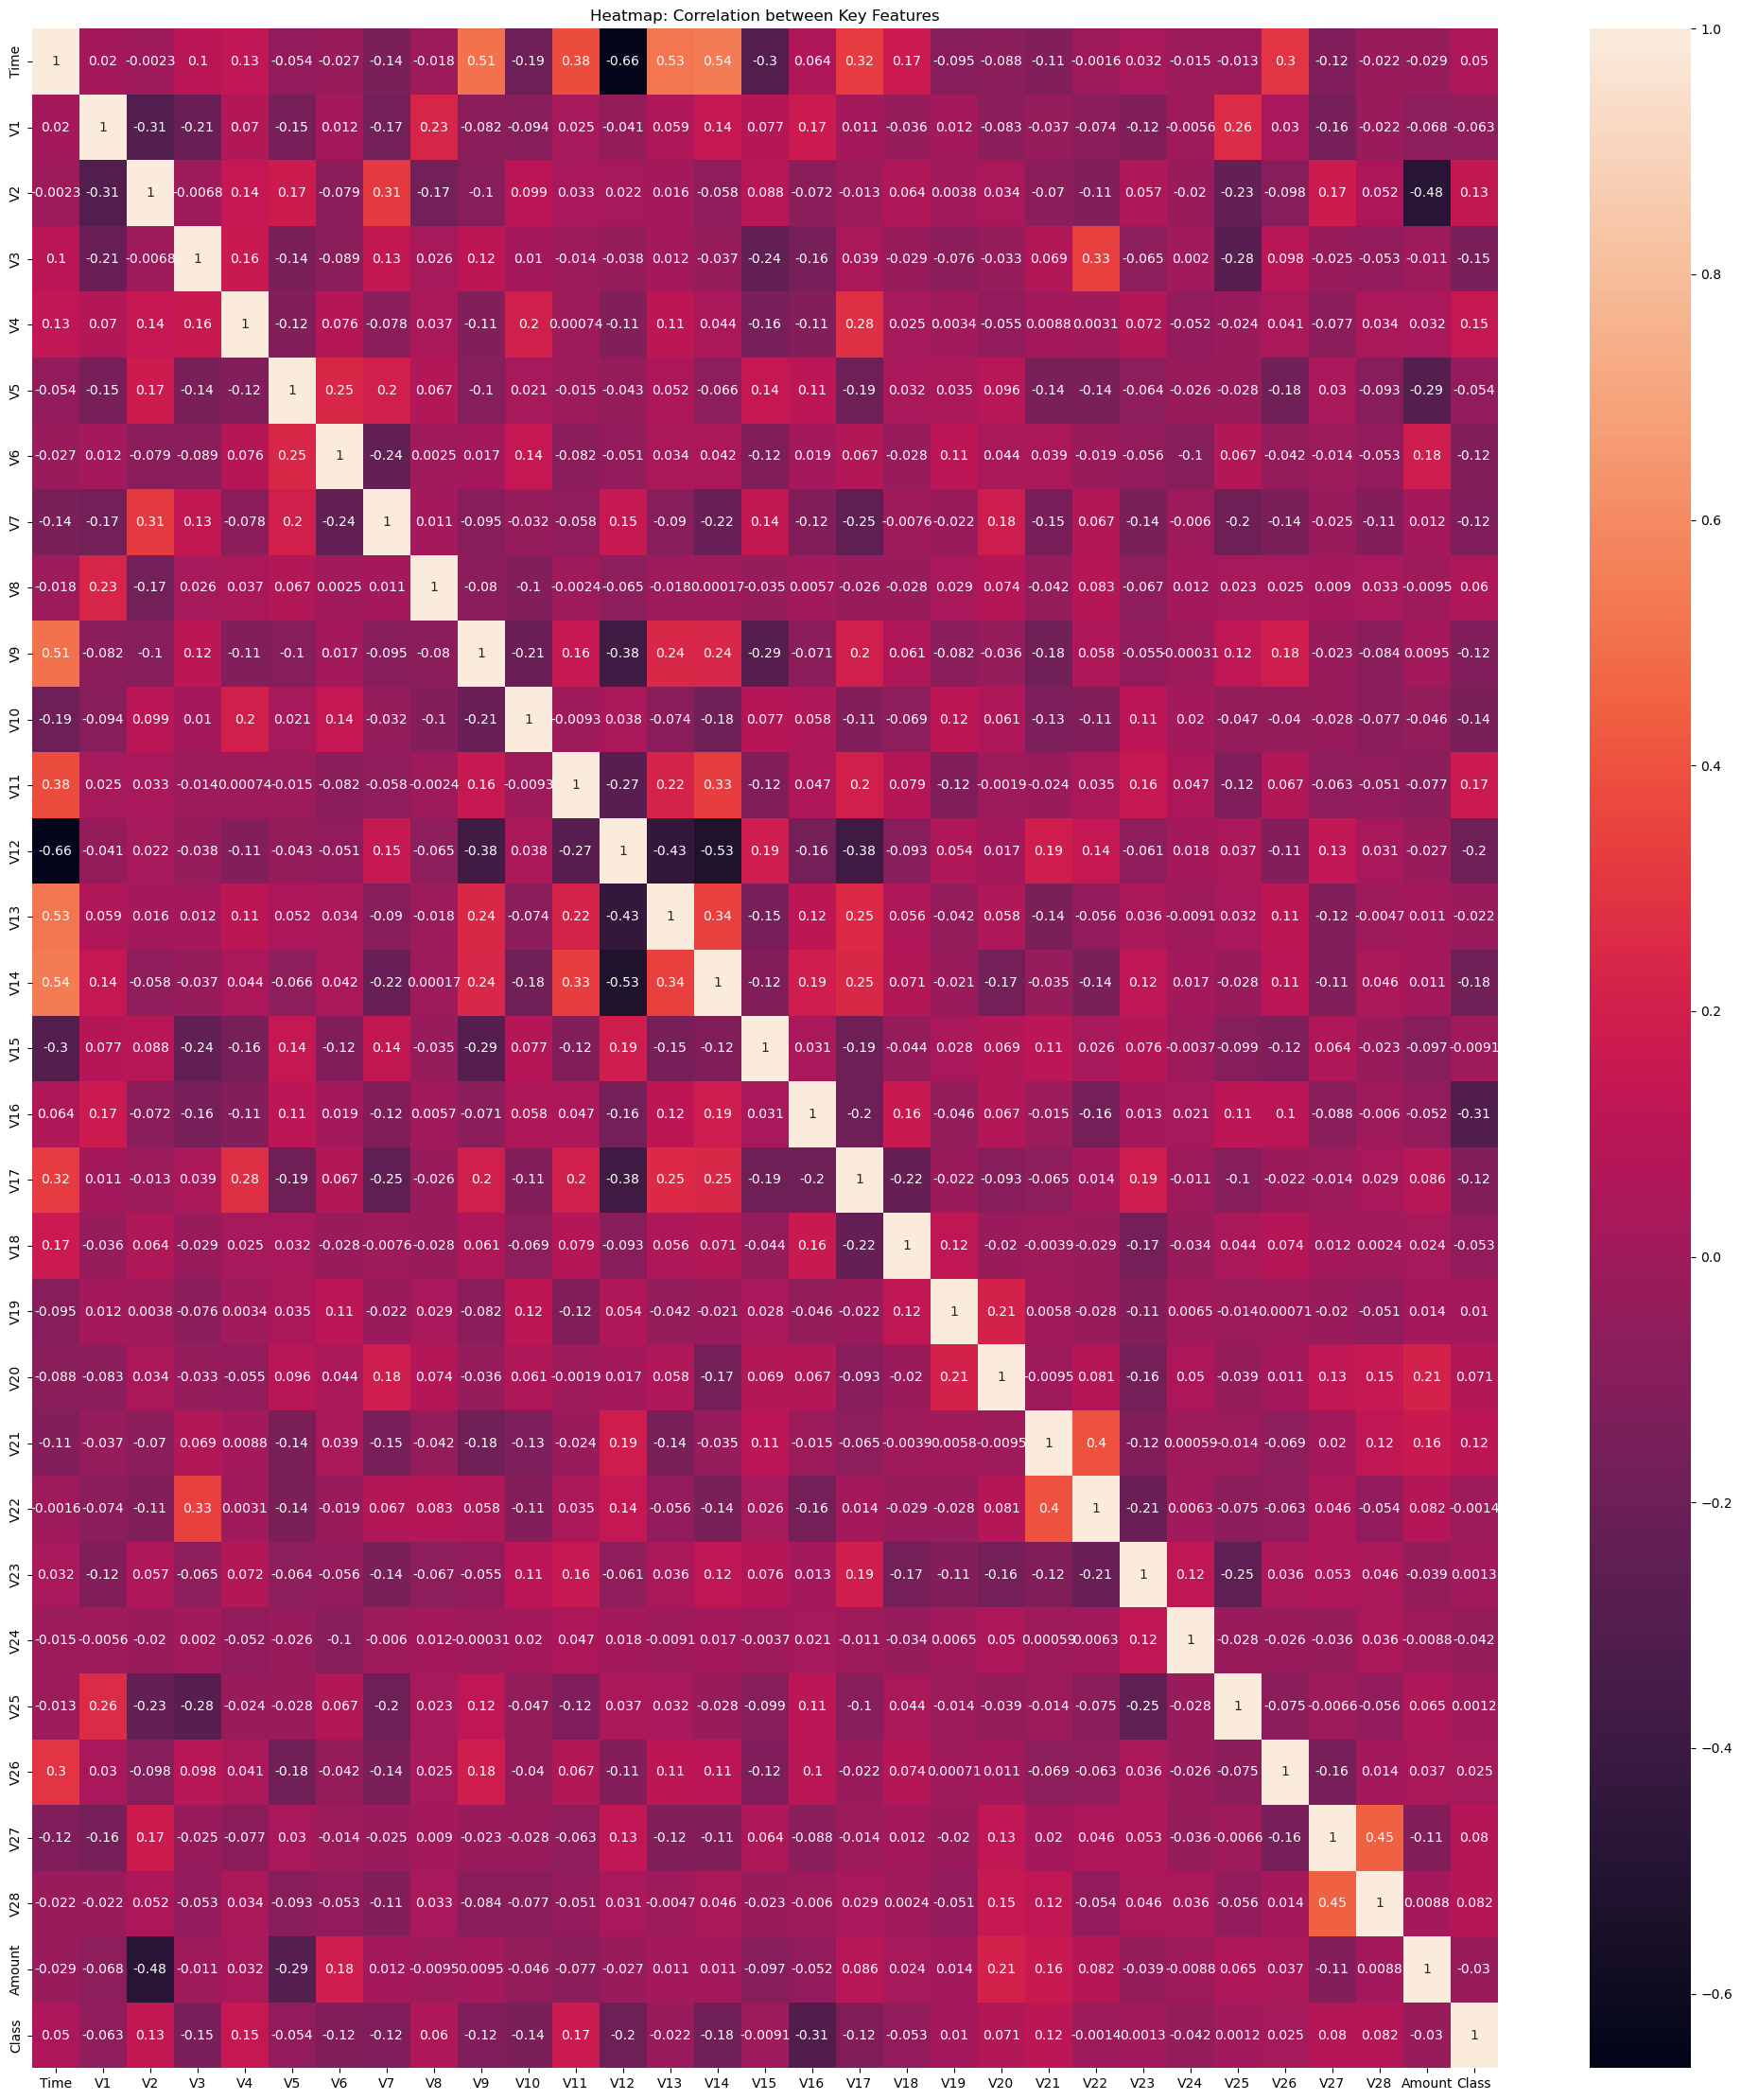

In [260]:
# Heatmap: Correlation between key numerical columns
plt.figure(figsize=(25, 28))
sns.heatmap(df.corr(), annot=True)
plt.title('Heatmap: Correlation between Key Features')
plt.show()

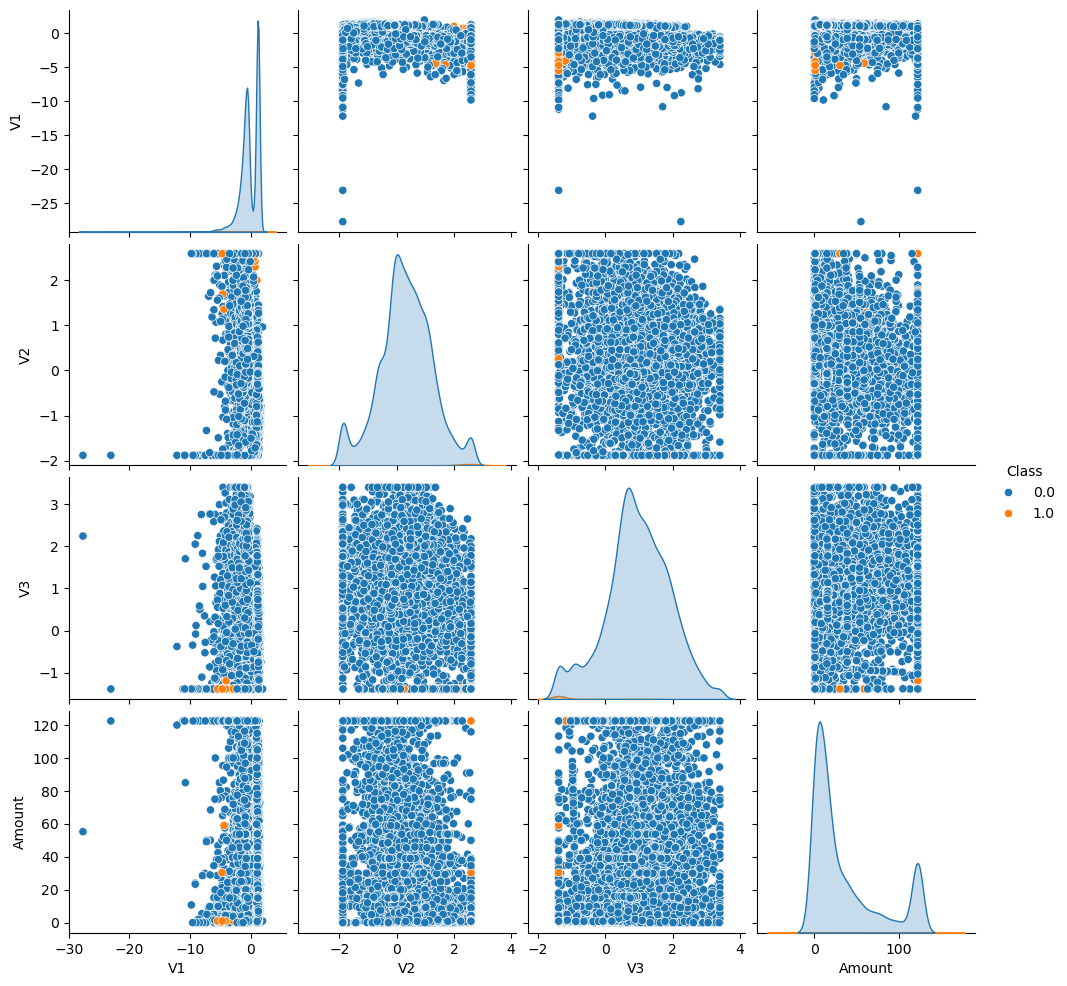

In [261]:
# 1. Pair plot for relationships between multiple numerical variables
selected_columns = ['V1', 'V2', 'V3', 'Amount', 'Class']
sns.pairplot(df[selected_columns], hue='Class', diag_kind='kde')
plt.show()

In [262]:
# Train-test split
X = df.drop(columns=['Class']) 
y = df['Class']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [263]:
xtrain.shape

(7740, 30)

In [264]:
xtest.shape

(1935, 30)

In [265]:
ytrain.shape

(7740,)

In [266]:
ytest.shape

(1935,)